<a href="https://colab.research.google.com/github/gbiamgaurav/ML-Use-Cases/blob/main/ScikitLearn_XGBoost_Models_End_to_End_incl_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

## **Load all Libraries**

In [ ]:
pip install ucimlrepo shap

In [ ]:
# GENERAL
import warnings

# DATA
from ucimlrepo import fetch_ucirepo

# DATA Processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scikitlearn
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


## 1. Linear Models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars,
    OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor,
    PassiveAggressiveRegressor, HuberRegressor, QuantileRegressor
)

## 2. SVM Models
from sklearn.svm import SVR, NuSVR, LinearSVR

## 3. Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

## 4. Tree Based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor, StackingRegressor

# XGBoost
from xgboost import XGBRegressor, plot_importance

## 5. Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor

## 6. Discrimant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## 7. NN
from sklearn.neural_network import MLPRegressor

## 8. Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB



# SHAP
import shap


## **Load Functions**

In [ ]:
def load_data_from_uci(id_code):

  # fetch dataset
  uci_data = fetch_ucirepo(id=id_code)

  # data (as pandas dataframes)
  input_features = uci_data.data.features
  target_feature = uci_data.data.targets
  metadata = uci_data.data.metadata
  variables_info = uci_data.data.variables

  return input_features, target_feature, metadata, variables_info

# **Data Understanding**

## **Load Data**

In [ ]:
  '''Go to UC Irvine Machine Learning reposity and find the Data Set you like
  https://archive.ics.uci.edu/dataset/242/energy+efficiency and then use Import
  in Python button and then Copy the Python Code into your Notebook
  to Load the Data
  '''

input_features, target_feature, metadata, variables_info =  load_data_from_uci(id_code = 242)

## **Data Explorarion**

In [ ]:
input_features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [ ]:
target_feature.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [ ]:
print(metadata)

None


In [ ]:
print(variables_info)

None


In [ ]:
input_features.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.830,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.125,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.500,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.250,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.400,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.000,5.00


In [ ]:
input_features.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
dtype: int64

In [ ]:
target_feature.isna().sum()

Y1    0
Y2    0
dtype: int64

The Energy Efficiency Data Set is specifically designed for studying the energy efficiency of buildings. Here are the key details and features of this dataset:


---


The dataset includes parameters related to the energy efficiency of residential buildings. The primary focus is on predicting two important aspects:

* **Y1: Heating Load (HL):** The amount of heat energy required to maintain a comfortable indoor temperature.
* **Y2: Cooling Load (CL):** The amount of cooling energy required to maintain a comfortable indoor temperature.
Attributes


---


The dataset contains eight input variables that describe various physical and architectural properties of the buildings. These are:

* **X1: Relative Compactness**: Ratio of the building’s volume to its envelope area.
* **X2: Surface Area:** Total exterior surface area of the building.
* **X3: Wall Area:** Total area of the building’s walls.
* **X4: Roof Area:** Total area of the building’s roof.
* **X5: Overall Height:** Height of the building.
* **X6: Orientation:** Direction the building faces (North, South, East, West).
* **X7: Glazing Area:** Total area of windows in the building.
* **X8: Glazing Area Distribution:** Distribution of the glazing area among the four facades.


In [ ]:
column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

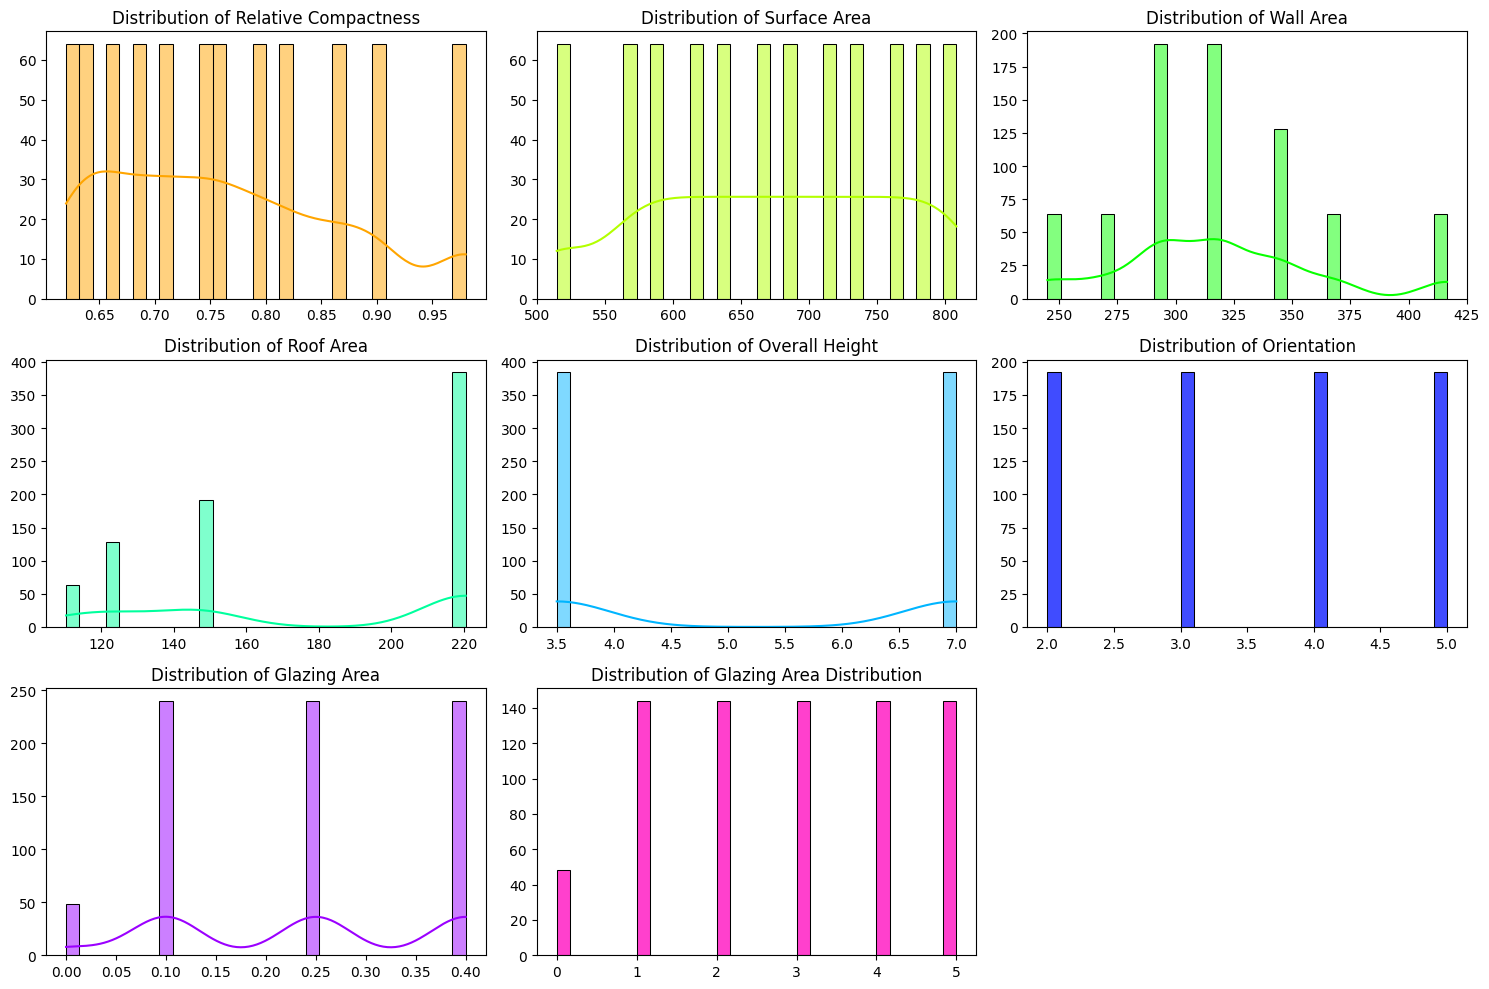

In [ ]:
# Plot distribution of all input features
input_features_names = input_features.columns

plt.figure(figsize=(15, 10))
colors = sns.color_palette("hsv", len(input_features_names))

for i, (feature, color) in enumerate(zip(input_features_names, colors), 1):
    plt.subplot(3, 3, i)
    if feature in ['Orientation', 'Glazing Area Distribution']:
        sns.histplot(input_features[feature], kde=False, color=color, bins=30)
    else:
        sns.histplot(input_features[feature], kde=True, color=color, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# **Modelling**

## **1. Multivariable Linear Regression (incl. 13 Regression Algorithms)**


### **Foundation**

**Multivariable Linear Regression** <br>
In the context of the listed models:

* **Traditional Multivariable Linear Regression:** Linear Regression, Ridge, Lasso, and ElasticNet. <br>
* **Extended Linear Models:** LARS, LassoLARS, OMP, Bayesian Ridge, ARD, SGD Regressor, Passive Aggressive Regressor, Huber Regressor, and Quantile Regressor. <br>

**1. Linear Regression**<br>
Use Case: Predicting a continuous outcome.
Example: Predicting house prices based on features like size, location, and number of rooms.
Explanation: Fits a straight line to the data that minimizes the squared differences between observed and predicted values.<br>

**2. Ridge Regression**<br>
Use Case: Similar to linear regression but with a regularization term.
Example: Predicting house prices when you want to prevent overfitting.
Explanation: Adds a penalty on the size of coefficients to shrink them, which helps in dealing with multicollinearity (when predictors are highly correlated).<br>

**3. Lasso Regression**<br>
Use Case: Like ridge regression but can set some coefficients to exactly zero.
Example: Predicting house prices and also performing feature selection by eliminating less important features.
Explanation: Adds a penalty that can zero out some coefficients, which simplifies the model by selecting only important predictors.<br>
**4. Elastic Net**<br>
Use Case: Combines the penalties of ridge and lasso regression.
Example: Predicting house prices when you suspect both multicollinearity and irrelevant features.
Explanation: Balances between ridge (shrinkage) and lasso (feature selection) by mixing their penalties.<br>
**5. Least Angle Regression (LARS)**
Use Case: Efficient when dealing with high-dimensional data (many predictors).
Example: Selecting a subset of features for predicting house prices from a large set of possible features.
Explanation: Iteratively builds the model by adding the most correlated predictors one at a time.<br>
**6. Lasso Least Angle Regression (LassoLARS)**<br>
Use Case: Combines Lasso and LARS for feature selection in high-dimensional settings.
Example: Similar to Lasso but more efficient for high-dimensional data.
Explanation: Uses LARS with a Lasso penalty to select features.<br>
**7. Orthogonal Matching Pursuit (OMP)**<br>
Use Case: Selecting a subset of features for prediction.
Example: Predicting house prices with a small number of the most important features.
Explanation: Iteratively selects predictors that most improve the model fit.<br>
**8. Bayesian Ridge Regression**<br>
Use Case: Incorporating prior information about the distribution of the coefficients.
Example: Predicting house prices with uncertainty estimates for the predictions.
Explanation: Uses Bayesian inference to estimate the distribution of the coefficients.<br>
**9. Automatic Relevance Determination (ARD)**<br>
Use Case: Similar to Bayesian Ridge but more flexible in how it handles the relevance of each predictor.
Example: Predicting house prices while determining which features are truly relevant.
Explanation: Uses separate priors for each coefficient, allowing for different levels of regularization.<br>
**10. Stochastic Gradient Descent (SGD)**<br>
Use Case: Large-scale linear regression and classification problems.
Example: Predicting house prices with a large dataset.
Explanation: Uses an iterative approach to find the best coefficients, which is efficient for large datasets.<br>
**11. Passive Aggressive Algorithms**<br>
Use Case: Online learning where the model is updated as new data comes in.
Example: Predicting house prices in a real-time application where new data arrives continuously.
Explanation: Updates the model only when it makes a wrong prediction, making it suitable for online learning.<br>
**12. Logistic Regression**<br>
Use Case: Predicting binary outcomes (yes/no).
Example: Predicting whether a house will sell within a month based on its features.
Explanation: Models the probability of a binary outcome using a logistic function.<br>
**13. Perceptron**<br>
Use Case: Simple binary classification problems.
Example: Classifying emails as spam or not spam.
Explanation: A single-layer neural network that updates weights based on misclassifications.<br>
**14. Poisson Regression**<br>
Use Case: Predicting count data.
Example: Predicting the number of houses sold in a month.
Explanation: Assumes the target variable follows a Poisson distribution.<br>
**15. Huber Regression**<br>
Use Case: Robust regression that is less sensitive to outliers.
Example: Predicting house prices with some outliers in the data.
Explanation: Uses a combination of linear regression and a penalty for outliers.<br>
**16. Quantile Regression**<br>
Use Case: Predicting different quantiles (percentiles) of the outcome.
Example: Predicting the median house price or the 90th percentile price.
Explanation: Estimates the conditional median or other quantiles of the target variable.<br>

### **Visulisation**

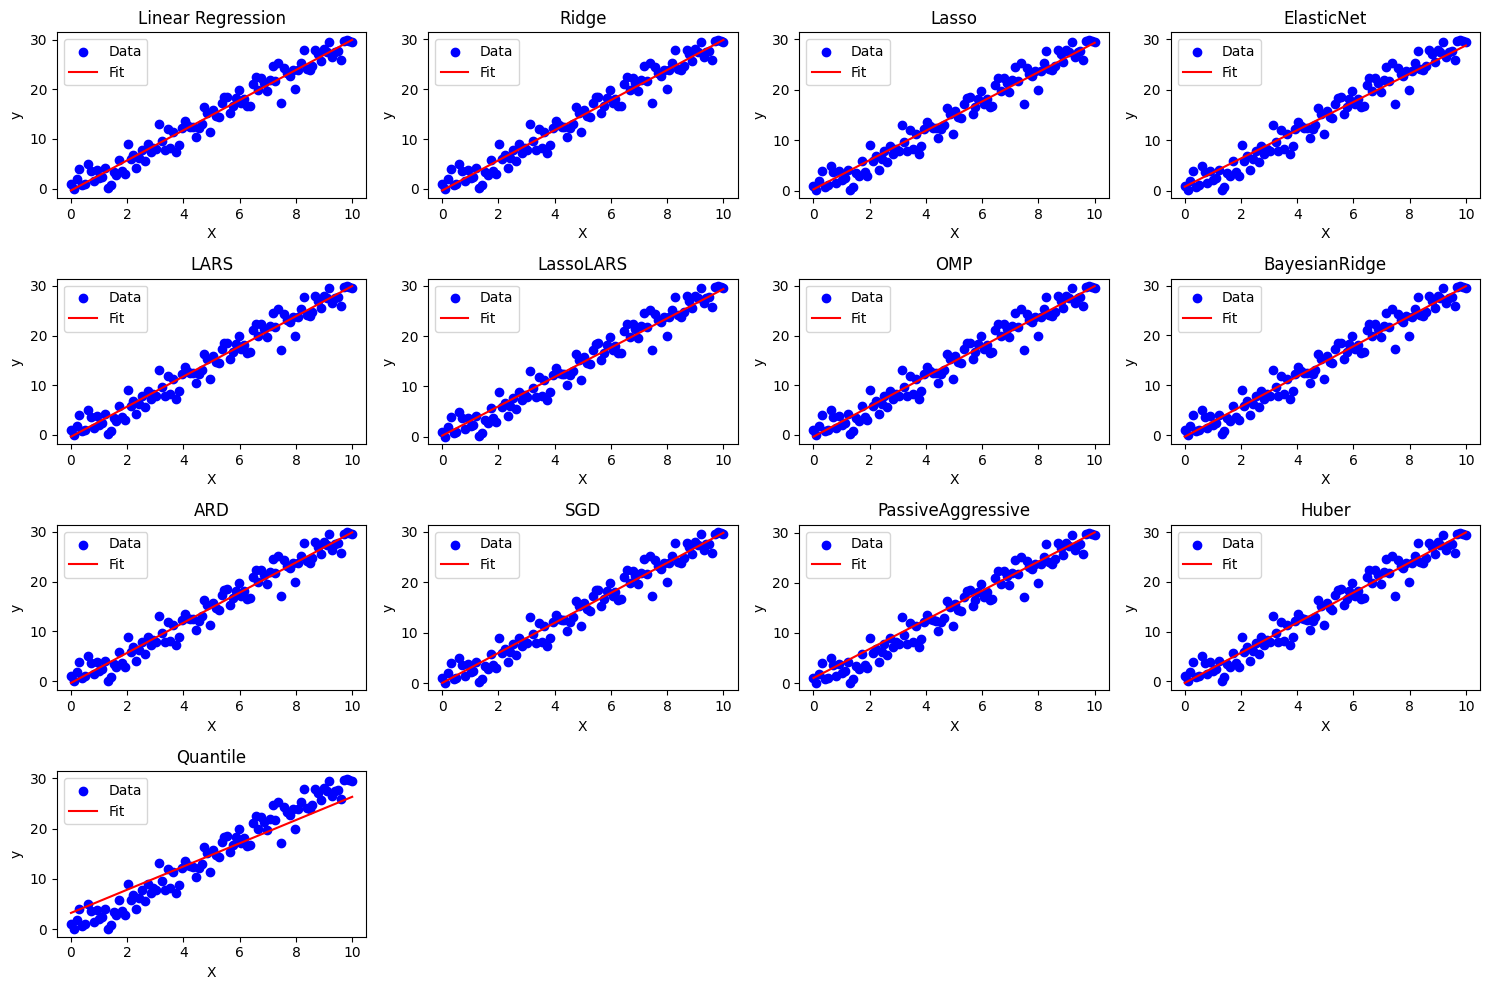

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 2

# Define models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LARS': Lars(),
    'LassoLARS': LassoLars(),
    'OMP': OrthogonalMatchingPursuit(),
    'BayesianRidge': BayesianRidge(),
    'ARD': ARDRegression(),
    'SGD': SGDRegressor(max_iter=1000, tol=1e-3),
    'PassiveAggressive': PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    'Huber': HuberRegressor(),
    'Quantile': QuantileRegressor(solver='highs')
}

# Fit each model and plot the results
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(regression_models.items(), 1):
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(4, 4, i)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Fit')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


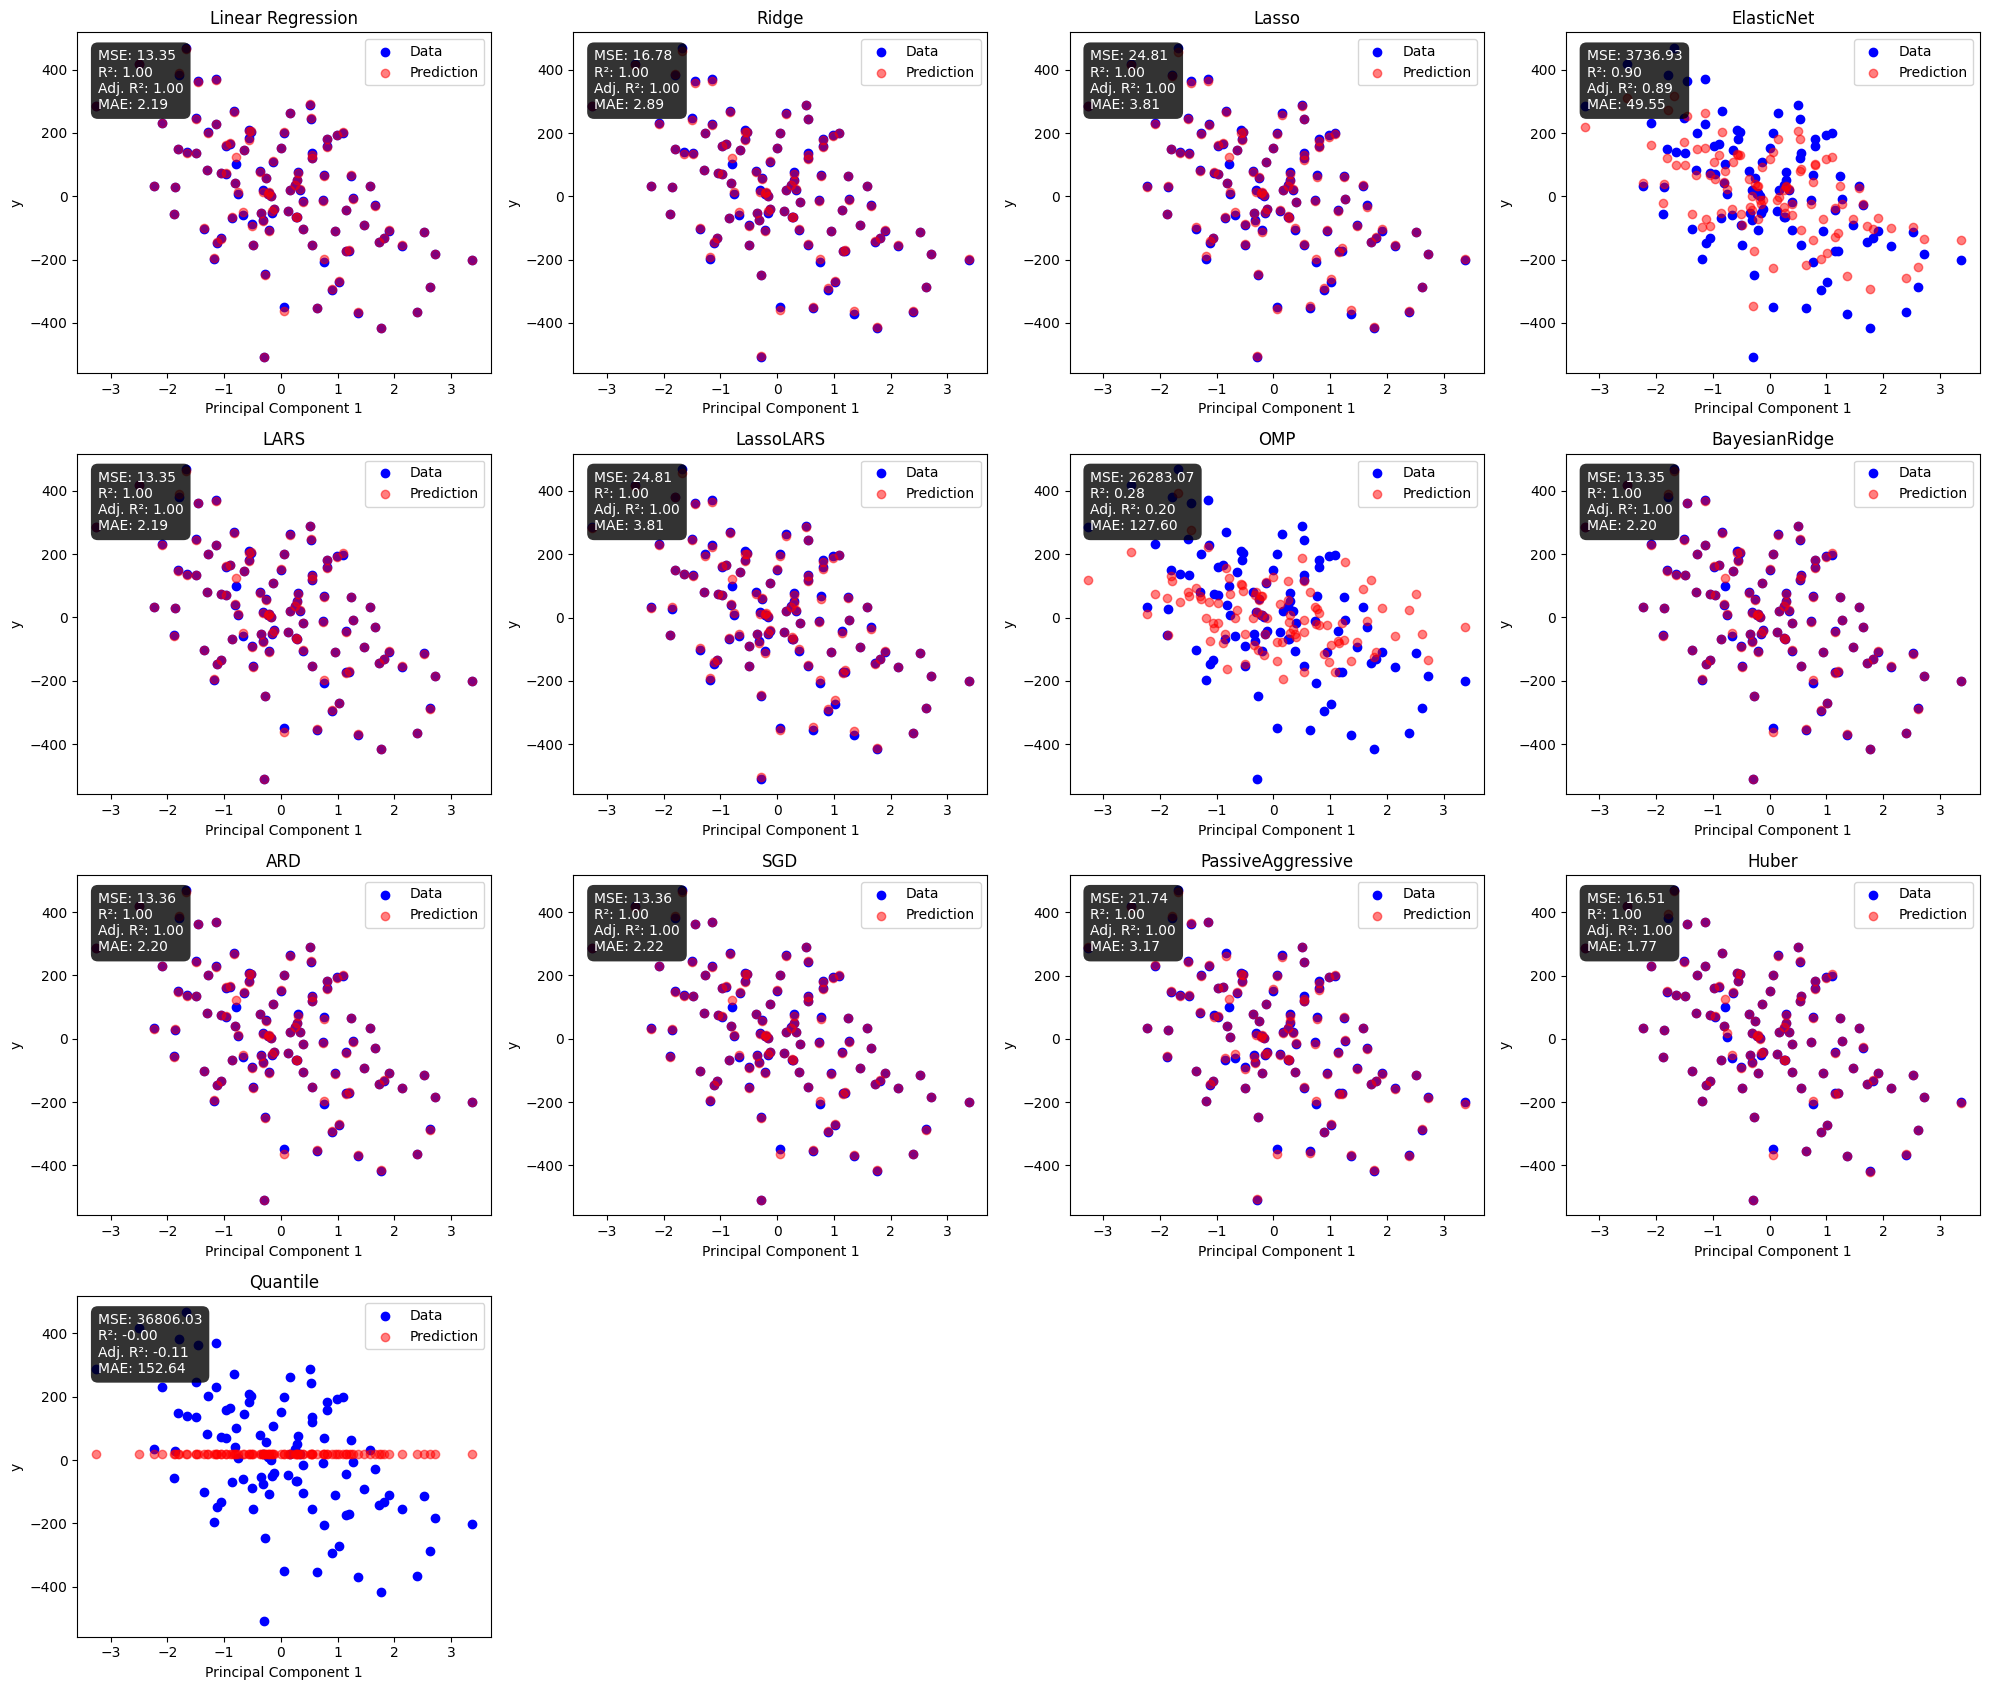

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars,
    OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor,
    PassiveAggressiveRegressor, HuberRegressor, QuantileRegressor
)


# Generate synthetic multivariate data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# Add some nonlinearity
y += np.sin(X[:, 0]) * 10

# Add some outliers
n_outliers = 5
outliers_index = np.random.choice(np.arange(100), n_outliers, replace=False)
y[outliers_index] += 20 * np.random.randn(n_outliers)

# Define models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LARS': Lars(),
    'LassoLARS': LassoLars(),
    'OMP': OrthogonalMatchingPursuit(),
    'BayesianRidge': BayesianRidge(),
    'ARD': ARDRegression(),
    'SGD': SGDRegressor(max_iter=1000, tol=1e-3),
    'PassiveAggressive': PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    'Huber': HuberRegressor(),
    'Quantile': QuantileRegressor(solver='highs')
}

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Fit each model, apply PCA, and plot the results
plt.figure(figsize=(20, 17))

for i, (name, model) in enumerate(regression_models.items(), 1):
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2_score(r2, len(y), X.shape[1])
    mae = mean_absolute_error(y, y_pred)

    # Apply PCA to reduce to one dimension for visualization
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X)

    plt.subplot(4, 4, i)
    plt.scatter(X_pca, y, color='blue', label='Data')
    plt.scatter(X_pca, y_pred, color='red', label='Prediction', alpha=0.5)
    plt.title(name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('y')
    plt.legend()

    # Add performance metrics to the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nR²: {r2:.2f}\nAdj. R²: {adj_r2:.2f}\nMAE: {mae:.2f}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='left',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='black', edgecolor='none', alpha=0.8), color='white')


plt.tight_layout()
plt.show()


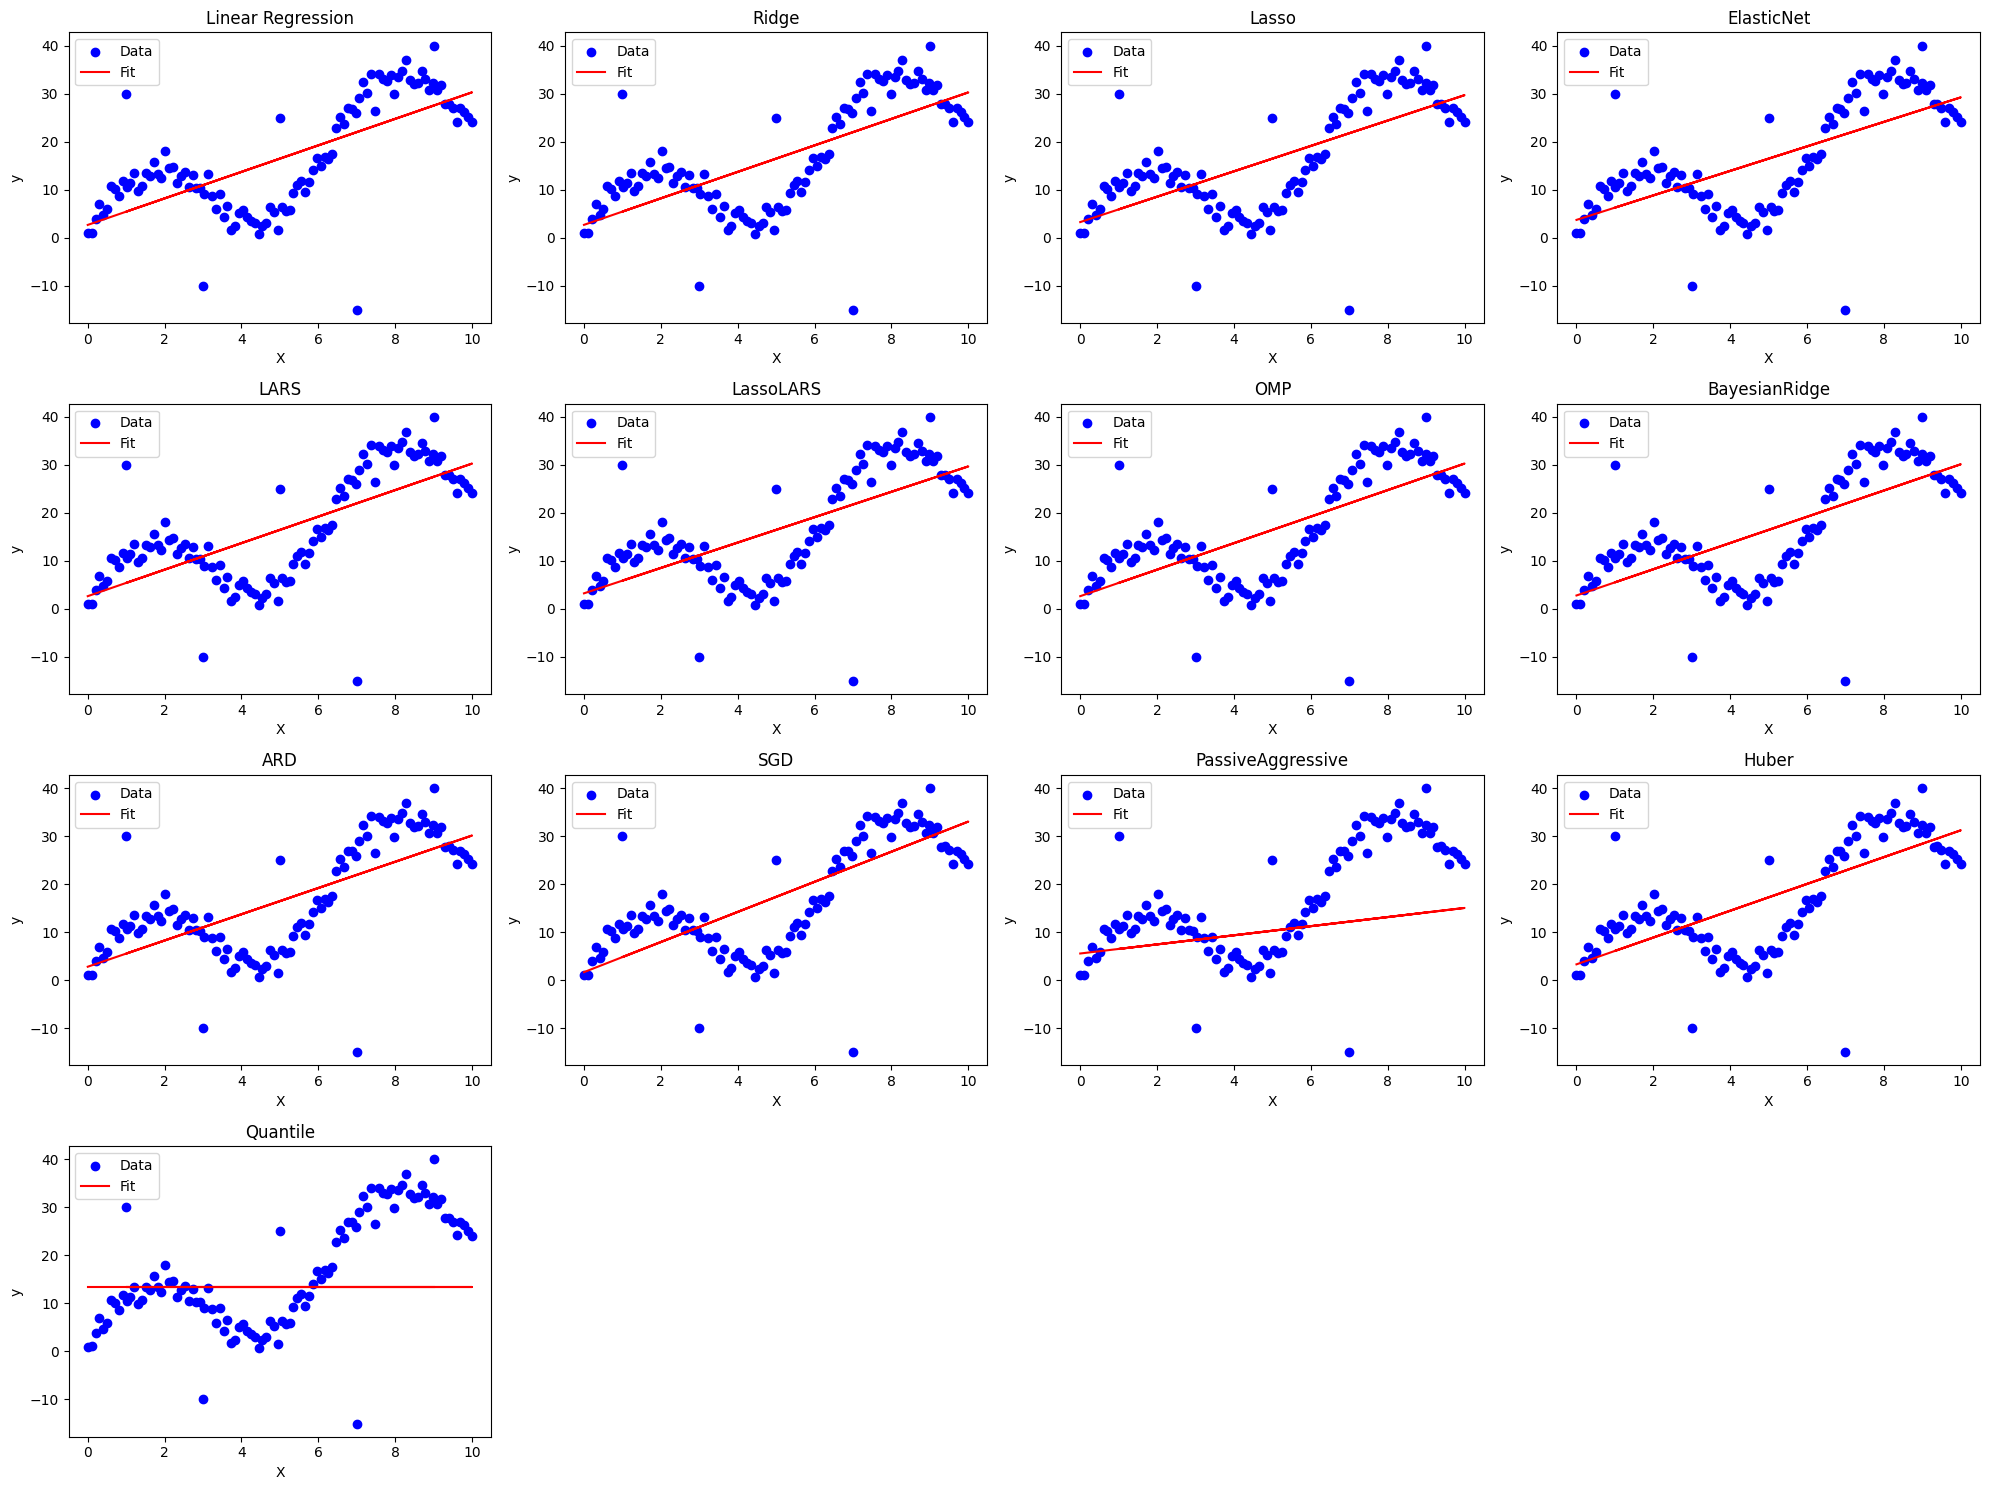

In [ ]:
# Generate synthetic data with nonlinearity and outliers
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.sin(X).squeeze() * 10 + np.random.randn(100) * 2

# Add outliers
X_outliers = np.array([1, 3, 5, 7, 9]).reshape(-1, 1)
y_outliers = np.array([30, -10, 25, -15, 40])
X = np.vstack([X, X_outliers])
y = np.concatenate([y, y_outliers])

# Define models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LARS': Lars(),
    'LassoLARS': LassoLars(),
    'OMP': OrthogonalMatchingPursuit(),
    'BayesianRidge': BayesianRidge(),
    'ARD': ARDRegression(),
    'SGD': SGDRegressor(max_iter=1000, tol=1e-3),
    'PassiveAggressive': PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    'Huber': HuberRegressor(),
    'Quantile': QuantileRegressor(solver='highs')
}

# Fit each model and plot the results
plt.figure(figsize=(20, 15))

for i, (name, model) in enumerate(regression_models.items(), 1):
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(4, 4, i)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Fit')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


### **Building 13 Linear Regression Models - Complete Pipeline**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define models for regression tasks
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LARS': Lars(),
    'LassoLARS': LassoLars(),
    'OMP': OrthogonalMatchingPursuit(),
    'BayesianRidge': BayesianRidge(),
    'ARD': ARDRegression(),
    'SGD': SGDRegressor(),
    'PassiveAggressive': PassiveAggressiveRegressor(),
    'Huber': HuberRegressor(),
    'Quantile': QuantileRegressor(solver='highs')
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)


                                                        Heating Load  \
Linear Regression  {'MSE': 8.064253320897944, 'R2': 0.92012957994...   
Ridge              {'MSE': 8.082558846788453, 'R2': 0.91996877151...   
Lasso              {'MSE': 11.851569462518839, 'R2': 0.8826083076...   
ElasticNet         {'MSE': 17.195903755223817, 'R2': 0.8299307596...   
LARS               {'MSE': 15.546429883883224, 'R2': 0.8353302290...   
LassoLARS          {'MSE': 11.851546165156083, 'R2': 0.8826085322...   
OMP                {'MSE': 21.37245073792868, 'R2': 0.78717598585...   
BayesianRidge      {'MSE': 8.076722213453863, 'R2': 0.92002247336...   
ARD                {'MSE': 7.924633956290984, 'R2': 0.92152068982...   
SGD                {'MSE': 8.216077044744184, 'R2': 0.91875045626...   
PassiveAggressive  {'MSE': 14.909237291908301, 'R2': 0.8350818476...   
Huber              {'MSE': 8.148411322414507, 'R2': 0.91933211719...   
Quantile           {'MSE': 115.63983707155589, 'R2': -0.14204022

### **Model Comparison 13 MLR Models**

In [ ]:
results_df['Heating Load']

Linear Regression    {'MSE': 8.064253320897944, 'R2': 0.92012957994...
Ridge                {'MSE': 8.082558846788453, 'R2': 0.91996877151...
Lasso                {'MSE': 11.851569462518839, 'R2': 0.8826083076...
ElasticNet           {'MSE': 17.195903755223817, 'R2': 0.8299307596...
LARS                 {'MSE': 15.546429883883224, 'R2': 0.8353302290...
LassoLARS            {'MSE': 11.851546165156083, 'R2': 0.8826085322...
OMP                  {'MSE': 21.37245073792868, 'R2': 0.78717598585...
BayesianRidge        {'MSE': 8.076722213453863, 'R2': 0.92002247336...
ARD                  {'MSE': 7.924633956290984, 'R2': 0.92152068982...
SGD                  {'MSE': 8.216077044744184, 'R2': 0.91875045626...
PassiveAggressive    {'MSE': 14.909237291908301, 'R2': 0.8350818476...
Huber                {'MSE': 8.148411322414507, 'R2': 0.91933211719...
Quantile             {'MSE': 115.63983707155589, 'R2': -0.142040223...
Name: Heating Load, dtype: object

In [ ]:
results_df['Cooling Load']

Linear Regression    {'MSE': 10.275063763200151, 'R2': 0.8854658444...
Ridge                {'MSE': 10.291030811052892, 'R2': 0.8853131787...
Lasso                {'MSE': 13.627328610724295, 'R2': 0.8483228763...
ElasticNet           {'MSE': 18.118904987020713, 'R2': 0.7985280895...
LARS                 {'MSE': 11.144784461798547, 'R2': 0.8760448687...
LassoLARS            {'MSE': 13.62730708003576, 'R2': 0.84832311716...
OMP                  {'MSE': 17.930597418852848, 'R2': 0.7997355188...
BayesianRidge        {'MSE': 10.293957577000342, 'R2': 0.8852820970...
ARD                  {'MSE': 10.245129283372567, 'R2': 0.8858329888...
SGD                  {'MSE': 10.422606522368714, 'R2': 0.8839325303...
PassiveAggressive    {'MSE': 19.95064941951933, 'R2': 0.79914591228...
Huber                {'MSE': 10.456165985408912, 'R2': 0.8834229714...
Quantile             {'MSE': 98.09260609965199, 'R2': -0.0921096378...
Name: Cooling Load, dtype: object

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")


Heating Load:
  Best MSE Model: ARD
  Best R2 Model: ARD
  Best Adjusted R2 Model: ARD
  Best MAE Model: Huber

Cooling Load:
  Best MSE Model: ARD
  Best R2 Model: ARD
  Best Adjusted R2 Model: ARD
  Best MAE Model: Huber


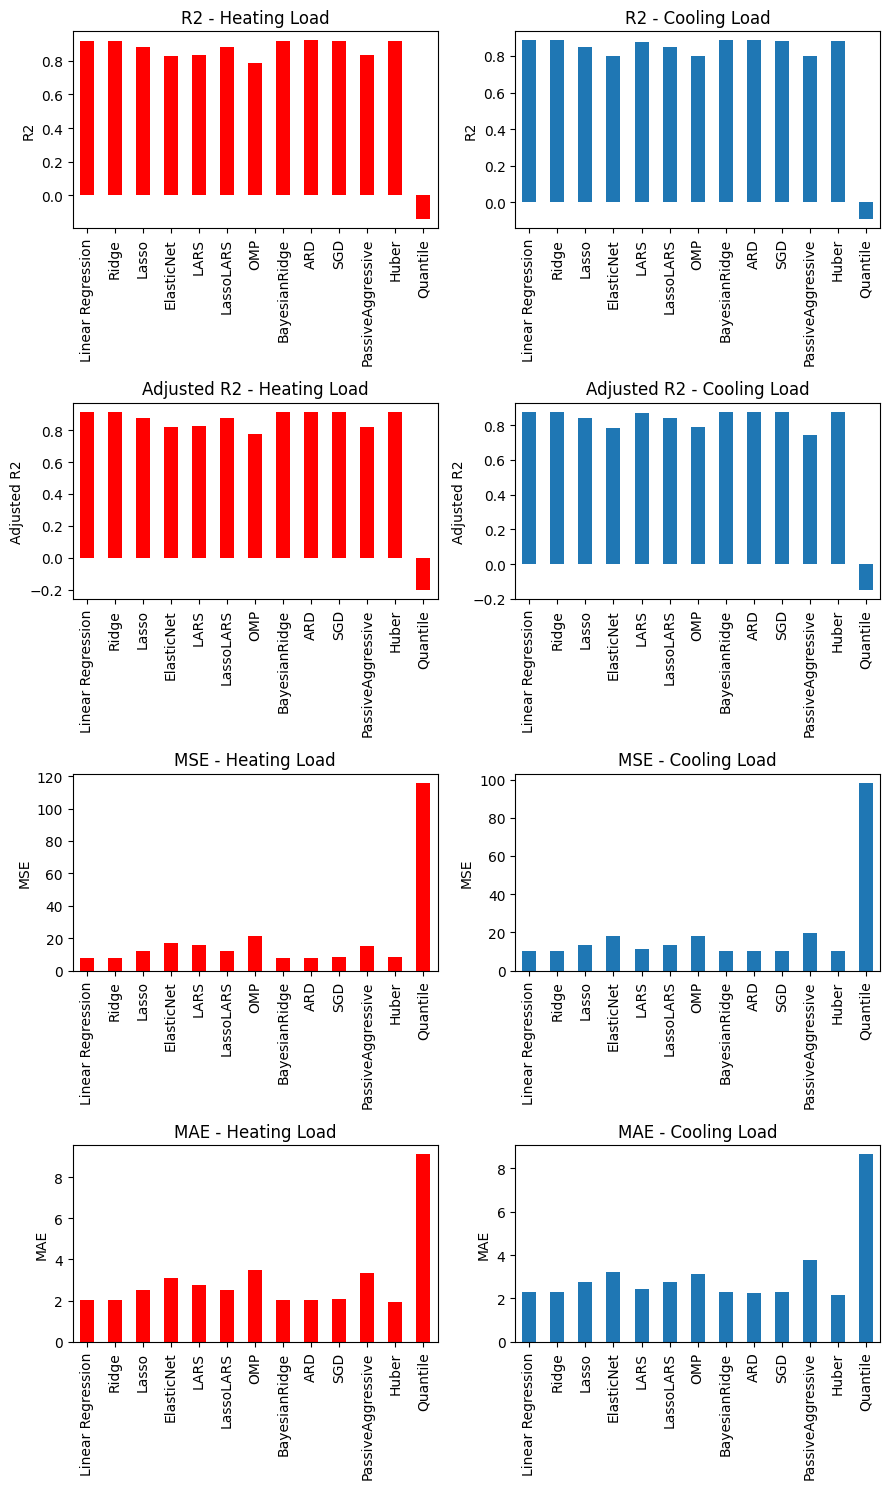

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



## **2. Support Vector Machines (incl. 3 Regression Algorithms)**

### **Foundation**

**Support Vector Machines (SVMs)**
Support Vector Machines are a set of supervised learning methods used for classification, regression, and outliers detection. The main idea is to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies the data points.

**Classification**
* Support Vector Classifier (SVC)

  - Function: sklearn.svm.SVC
  - Description: SVC is used for classification tasks. It tries to find the optimal hyperplane that maximizes the margin between different classes. It can handle non-linear boundaries through the use of kernel functions (e.g., polynomial, RBF).
  - Use Case: When you have a binary or multi-class classification problem and you suspect that the decision boundary between classes may not be linear.

* Nu-Support Vector Classifier (NuSVC)

  - Function: sklearn.svm.NuSVC
  - Description: NuSVC is similar to SVC but uses a parameter nu (between 0 and 1) to control the number of support vectors and the margin. This can provide more flexibility in controlling the trade-off between the margin size and the number of support vectors.
  - Use Case: When you want more control over the number of support vectors and the margin, often in situations where class distributions are imbalanced or when tuning the model for specific constraints.

* Linear Support Vector Classifier (LinearSVC)

  - Function: sklearn.svm.LinearSVC
  - Description: LinearSVC is a version of SVC that specifically handles linear decision boundaries efficiently. It uses a linear kernel and is suitable for large datasets due to its implementation using the liblinear library.
  - Use Case: When you know that the decision boundary between classes is linear and you have a large dataset.

**Regression**

* Support Vector Regressor (SVR)

  - Function: sklearn.svm.SVR
  - Description: SVR applies the principles of SVM to regression tasks. It tries to find a function that deviates from the actual observed values by a value no greater than a specified margin while being as flat as possible. It can handle non-linear relationships using kernel functions.
  - Use Case: When you have a regression problem where the relationship between the variables may not be linear and you want to use kernel functions to capture this non-linearity.

* Nu-Support Vector Regressor (NuSVR)

  - Function: sklearn.svm.NuSVR
  - Description: NuSVR is similar to SVR but uses the nu parameter to control the number of support vectors and the margin size. It provides a different way of controlling the model complexity compared to SVR.
  - Use Case: When you want more control over the number of support vectors and the margin size in regression tasks, especially useful in cases with specific constraints or requirements.

* Linear Support Vector Regressor (LinearSVR)

  - Function: sklearn.svm.LinearSVR
  - Description: LinearSVR is a version of SVR that specifically handles linear relationships efficiently. It uses a linear kernel and is suitable for large datasets due to its efficient implementation.
  - Use Case: When you have a regression problem with a linear relationship between variables and a large dataset.

### **Building 3 Support Vector Regression Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define SVR models for regression tasks
regression_models = {
    'SVR': SVR(),
    'NuSVR': NuSVR(),
    'LinearSVR': LinearSVR(max_iter=10000)
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)


                                                Heating Load  \
SVR        {'MSE': 6.71385257460675, 'R2': 0.933658464228...   
NuSVR      {'MSE': 6.811140568994579, 'R2': 0.93276330960...   
LinearSVR  {'MSE': 8.704071298431348, 'R2': 0.91393006246...   

                                                Cooling Load  
SVR        {'MSE': 9.141727622268933, 'R2': 0.89847287908...  
NuSVR      {'MSE': 9.578288553688175, 'R2': 0.89356160299...  
LinearSVR  {'MSE': 11.00729225969538, 'R2': 0.87736695915...  


### **Model Comparison 3 SVR Models**

In [ ]:
results_df['Heating Load']

SVR          {'MSE': 6.71385257460675, 'R2': 0.933658464228...
NuSVR        {'MSE': 6.811140568994579, 'R2': 0.93276330960...
LinearSVR    {'MSE': 8.704071298431348, 'R2': 0.91393006246...
Name: Heating Load, dtype: object

In [ ]:
results_df['Cooling Load']

SVR          {'MSE': 9.141727622268933, 'R2': 0.89847287908...
NuSVR        {'MSE': 9.578288553688175, 'R2': 0.89356160299...
LinearSVR    {'MSE': 11.00729225969538, 'R2': 0.87736695915...
Name: Cooling Load, dtype: object

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")


Heating Load:
  Best MSE Model: SVR
  Best R2 Model: SVR
  Best Adjusted R2 Model: SVR
  Best MAE Model: SVR

Cooling Load:
  Best MSE Model: SVR
  Best R2 Model: SVR
  Best Adjusted R2 Model: SVR
  Best MAE Model: SVR


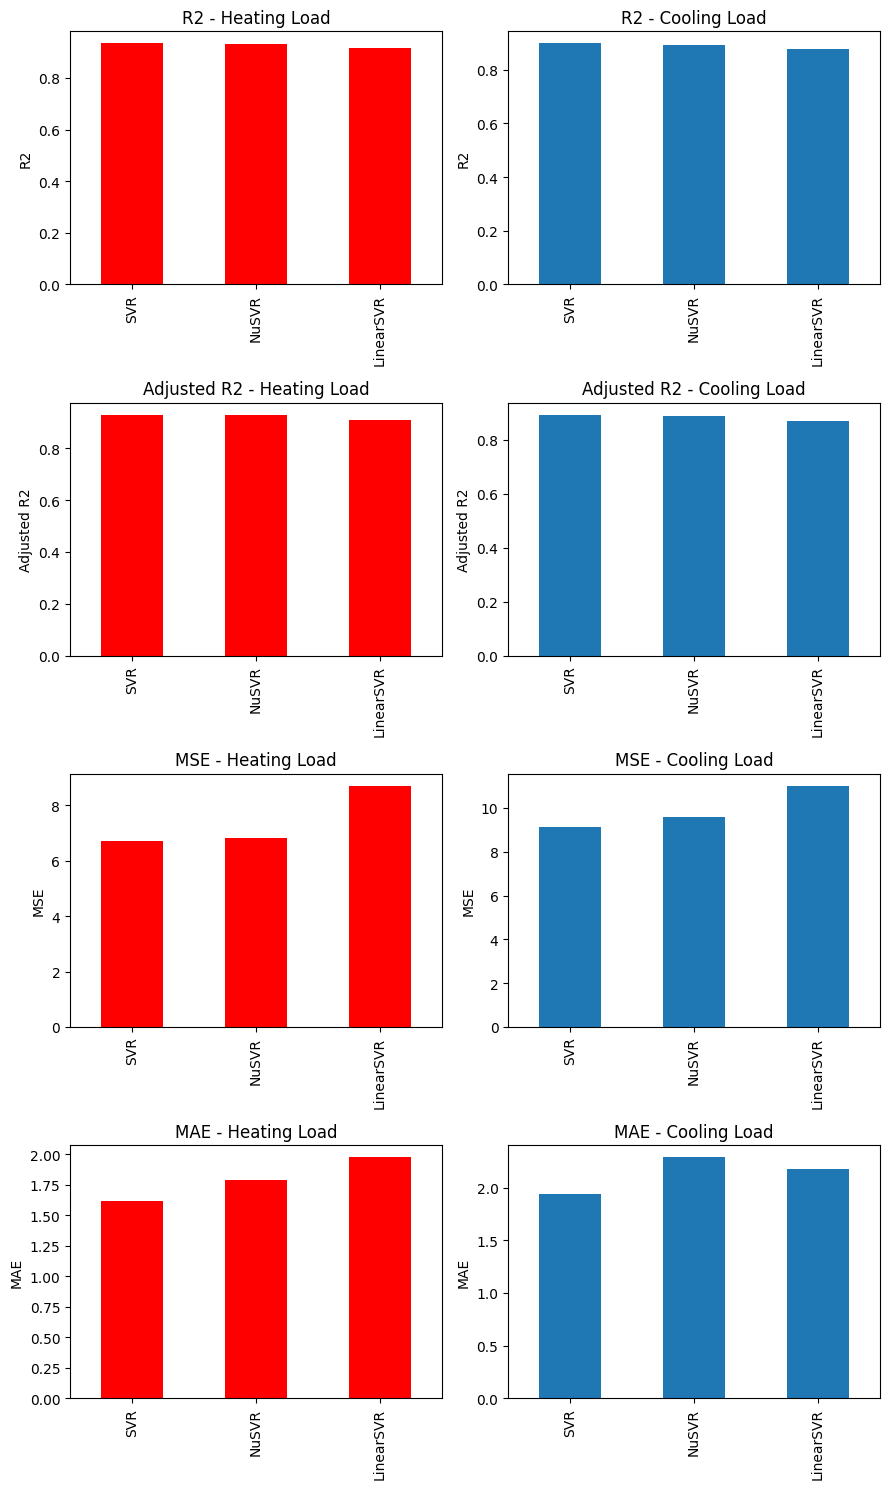

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



## **3. Nearest Neighbors (incl. 2 Regression Algorithms)**

### **Foundation**


The **Nearest Neighbors** algorithm is a type of instance-based learning, where the algorithm does not explicitly learn a model. Instead, it memorizes the training data and makes predictions based on the similarity of new data points to the training data.

**Classification**
* K-Nearest Neighbors Classifier (KNN)

  - Function: sklearn.neighbors.KNeighborsClassifier
  - Description: This algorithm classifies a data point based on the majority class among its k nearest neighbors. The value of k is a parameter you choose, and the "nearest" neighbors are usually determined by Euclidean distance.
  - Use Case: When you need a simple and interpretable classifier that can handle both small and large datasets. It works well when the decision boundary is irregular.

* Radius Neighbors Classifier

  - Function: sklearn.neighbors.RadiusNeighborsClassifier
  - Description: This classifier works similarly to KNN but uses all training samples within a fixed radius r of the test sample to make predictions. If there are no neighbors within the radius, a default prediction is made.
  - Use Case: Useful when the data density varies significantly across the feature space, and you want to ensure that predictions are based on local data points.

* Nearest Centroid Classifier

  - Function: sklearn.neighbors.NearestCentroid
  - Description: This classifier assigns a data point to the class of the nearest centroid (mean) of each class. It's a simple and fast method for classification.
  - Use Case: When you want a simple, interpretable model that can handle large datasets, and the data distribution of each class is roughly Gaussian.

**Regression**
* K-Nearest Neighbors Regressor (KNN Regressor)

  - Function: sklearn.neighbors.KNeighborsRegressor
  - Description: This algorithm predicts the value of a data point based on the average (or weighted average) of the values of its k nearest neighbors. The value of k is a parameter you choose.
  - Use Case: When you need a simple, interpretable regression model that can handle non-linear relationships and doesn't require assumptions about the form of the data distribution.

* Radius Neighbors Regressor

  - Function: sklearn.neighbors.RadiusNeighborsRegressor
  - Description: This regressor works similarly to the KNN Regressor but uses all training samples within a fixed radius r of the test sample to make predictions. If there are no neighbors within the radius, a default prediction is made.
  - Use Case: Useful when the data density varies significantly across the feature space, and you want to ensure that predictions are based on local data points.

### **Building 2 Nearest Neighbors Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)


# Define K-Nearest Neighbors and Radius Neighbors Regressor models
regression_models = {
    'KNeighbors Regressor': KNeighborsRegressor(),
    'RadiusNeighbors Regressor': RadiusNeighborsRegressor(radius=1.0)  # You can adjust the radius as needed
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

Model RadiusNeighbors Regressor failed with error: Input contains NaN.
                                                           Cooling Load  \
KNeighbors Regressor  {'MSE': 8.748789985128596, 'R2': 0.90226397373...   

                                                           Heating Load  
KNeighbors Regressor  {'MSE': 8.018697527442491, 'R2': 0.92050658308...  


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


### **Model Comparison 2 NN Models**

In [ ]:
results_df['Heating Load']

KNeighbors Regressor    {'MSE': 8.018697527442491, 'R2': 0.92050658308...
Name: Heating Load, dtype: object

In [ ]:
results_df['Cooling Load']

KNeighbors Regressor    {'MSE': 8.748789985128596, 'R2': 0.90226397373...
Name: Cooling Load, dtype: object

## **4. Decision Trees and Ensemble Methods (including 9 Regression Algorithms)**

### **Foundation**

**Decision Trees**
* Decision Tree Classifier

  - Function: sklearn.tree.DecisionTreeClassifier
  - Description: A tree-based method where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome. It's used for classification tasks.
  - Use Case: Simple and interpretable model for classifying data into categories.

* Decision Tree Regressor

  - Function: sklearn.tree.DecisionTreeRegressor
  - Description: Similar to the Decision Tree Classifier but used for regression tasks where the outcome is a continuous value.
  - Use Case: Predicting continuous values based on feature inputs.

**Random Forests**
* Random Forest Classifier

  - Function: sklearn.ensemble.RandomForestClassifier
  - Description: An ensemble method that creates multiple decision trees and merges them to get a more accurate and stable prediction. It uses majority voting for classification.
  - Use Case: Handling complex data with high variance, reducing overfitting compared to a single decision tree.

* Random Forest Regressor

  - Function: sklearn.ensemble.RandomForestRegressor
  - Description: Similar to the Random Forest Classifier but used for regression tasks. It averages the predictions of multiple decision trees.
  - Use Case: Predicting continuous values with better accuracy and less overfitting.

**Extra Trees**
* Extra Trees Classifier

  - Function: sklearn.ensemble.ExtraTreesClassifier
  - Description: Similar to Random Forests but with more randomness in splitting nodes. It often results in even less overfitting and faster computations.
  Use Case: Classification tasks requiring high accuracy and robustness.

* Extra Trees Regressor

  - Function: sklearn.ensemble.ExtraTreesRegressor
  - Description: Similar to the Extra Trees Classifier but used for regression tasks.
  - Use Case: Regression tasks with the need for robust and accurate predictions.

**Gradient Boosting**
* Gradient Boosting Classifier

  - Function: sklearn.ensemble.GradientBoostingClassifier
  - Description: An ensemble method that builds trees sequentially, with each tree trying to correct the errors of the previous one. It's used for classification.
  - Use Case: Classification tasks with the need for high accuracy, often outperforming Random Forests.

* Gradient Boosting Regressor**

  - Function: sklearn.ensemble.GradientBoostingRegressor
  - Description: Similar to the Gradient Boosting Classifier but used for regression tasks.
  - Use Case: Regression tasks requiring high accuracy.

**AdaBoost**
* AdaBoost Classifier

  - Function: sklearn.ensemble.AdaBoostClassifier
  - Description: An ensemble method that combines weak classifiers into a strong one by focusing on the errors of the previous classifiers. It assigns higher weights to misclassified instances.
  - Use Case: Improving the performance of simple models for classification tasks.

* AdaBoost Regressor

  - Function: sklearn.ensemble.AdaBoostRegressor
  - Description: Similar to the AdaBoost Classifier but used for regression tasks.
  - Use Case: Improving the performance of simple models for regression tasks.

**Bagging**

* Bagging Classifier

  - Function: sklearn.ensemble.BaggingClassifier
  - Description: An ensemble method that trains multiple versions of a classifier on different random subsets of the training data and combines their predictions.
  - Use Case: Reducing variance and improving the stability of classification models.

* Bagging Regressor

- Function: sklearn.ensemble.BaggingRegressor
- Description: Similar to the Bagging Classifier but used for regression tasks.
- Use Case: Reducing variance and improving the stability of regression models.

**Voting**
- Voting Classifier

- Function: sklearn.ensemble.VotingClassifier
- Description: An ensemble method that combines multiple classifiers by voting. It can use hard voting (majority) or soft voting (average probabilities).
- Use Case: Combining different classification models to improve performance.

- Voting Regressor

- Function: sklearn.ensemble.VotingRegressor
- Description: Similar to the Voting Classifier but used for regression tasks.
- Use Case: Combining different regression models to improve performance.

**Stacking**

* Stacking Classifier

  - Function: sklearn.ensemble.StackingClassifier
  - Description: An ensemble method that combines multiple classifiers using a meta-classifier. The base classifiers' predictions are used as input for the meta-classifier.
  - Use Case: Leveraging multiple classification models and combining them to boost performance.

* Stacking Regressor

  - Function: sklearn.ensemble.StackingRegressor
  - Description: Similar to the Stacking Classifier but used for regression tasks.
  - Use Case: Leveraging multiple regression models and combining them to boost performance.

**XGBoost**
* XGBoost Classifier

  - Function: xgboost.XGBClassifier
  - Description: An implementation of gradient boosting designed for speed and performance. It uses boosting to improve the accuracy of models by focusing on the errors of previous models.
  - Use Case: Classification tasks requiring high performance and accuracy.

* XGBoost Regressor

  - Function: xgboost.XGBRegressor
  - Description: Similar to the XGBoost Classifier but used for regression tasks.
  - Use Case: Regression tasks requiring high performance and accuracy.

### **Building 9 Tree Based Models - Ensemble Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Voting Regressor': VotingRegressor(estimators=[
        ('dt', DecisionTreeRegressor()),
        ('rf', RandomForestRegressor()),
        ('et', ExtraTreesRegressor())
    ]),
    'Stacking Regressor': StackingRegressor(estimators=[
        ('dt', DecisionTreeRegressor()),
        ('rf', RandomForestRegressor()),
        ('et', ExtraTreesRegressor())
    ]),
    'XGBoost Regressor': XGBRegressor()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)


                                                                  Heating Load  \
Decision Tree Regressor      {'MSE': 0.4281338714879893, 'R2': 0.9960899900...   
Random Forest Regressor      {'MSE': 0.2574038676823691, 'R2': 0.9974179532...   
Extra Trees Regressor        {'MSE': 0.3492406328448306, 'R2': 0.9965108242...   
Gradient Boosting Regressor  {'MSE': 0.21964067995101488, 'R2': 0.997840104...   
AdaBoost Regressor           {'MSE': 3.8002524481171562, 'R2': 0.9673724658...   
Bagging Regressor            {'MSE': 0.30047232212036373, 'R2': 0.997164924...   
Voting Regressor             {'MSE': 0.2974494075666174, 'R2': 0.9969613217...   
Stacking Regressor           {'MSE': 0.45154544438412036, 'R2': 0.995430797...   
XGBoost Regressor            {'MSE': 0.14877125770077615, 'R2': 0.998526237...   

                                                                  Cooling Load  
Decision Tree Regressor      {'MSE': 6.532941948900772, 'R2': 0.92559842410...  
Random Forest Reg

### **Model Comparison 9 Tree Based Ensemble Methods**

In [ ]:
results_df['Heating Load']

Decision Tree Regressor        {'MSE': 0.4281338714879893, 'R2': 0.9960899900...
Random Forest Regressor        {'MSE': 0.2574038676823691, 'R2': 0.9974179532...
Extra Trees Regressor          {'MSE': 0.3492406328448306, 'R2': 0.9965108242...
Gradient Boosting Regressor    {'MSE': 0.21964067995101488, 'R2': 0.997840104...
AdaBoost Regressor             {'MSE': 3.8002524481171562, 'R2': 0.9673724658...
Bagging Regressor              {'MSE': 0.30047232212036373, 'R2': 0.997164924...
Voting Regressor               {'MSE': 0.2974494075666174, 'R2': 0.9969613217...
Stacking Regressor             {'MSE': 0.45154544438412036, 'R2': 0.995430797...
XGBoost Regressor              {'MSE': 0.14877125770077615, 'R2': 0.998526237...
Name: Heating Load, dtype: object

In [ ]:
results_df['Cooling Load']

Decision Tree Regressor        {'MSE': 6.532941948900772, 'R2': 0.92559842410...
Random Forest Regressor        {'MSE': 3.480439758433918, 'R2': 0.96114567684...
Extra Trees Regressor          {'MSE': 6.007382500722861, 'R2': 0.93303700455...
Gradient Boosting Regressor    {'MSE': 2.3976986360737147, 'R2': 0.9732499214...
AdaBoost Regressor             {'MSE': 5.410508315779489, 'R2': 0.93451659884...
Bagging Regressor              {'MSE': 3.60216685500382, 'R2': 0.959017963252...
Voting Regressor               {'MSE': 4.984624536217724, 'R2': 0.94495269147...
Stacking Regressor             {'MSE': 3.2853902973292493, 'R2': 0.9644782828...
XGBoost Regressor              {'MSE': 1.1876906268147205, 'R2': 0.9868516699...
Name: Cooling Load, dtype: object

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")


Heating Load:
  Best MSE Model: XGBoost Regressor
  Best R2 Model: XGBoost Regressor
  Best Adjusted R2 Model: XGBoost Regressor
  Best MAE Model: XGBoost Regressor

Cooling Load:
  Best MSE Model: XGBoost Regressor
  Best R2 Model: XGBoost Regressor
  Best Adjusted R2 Model: XGBoost Regressor
  Best MAE Model: XGBoost Regressor


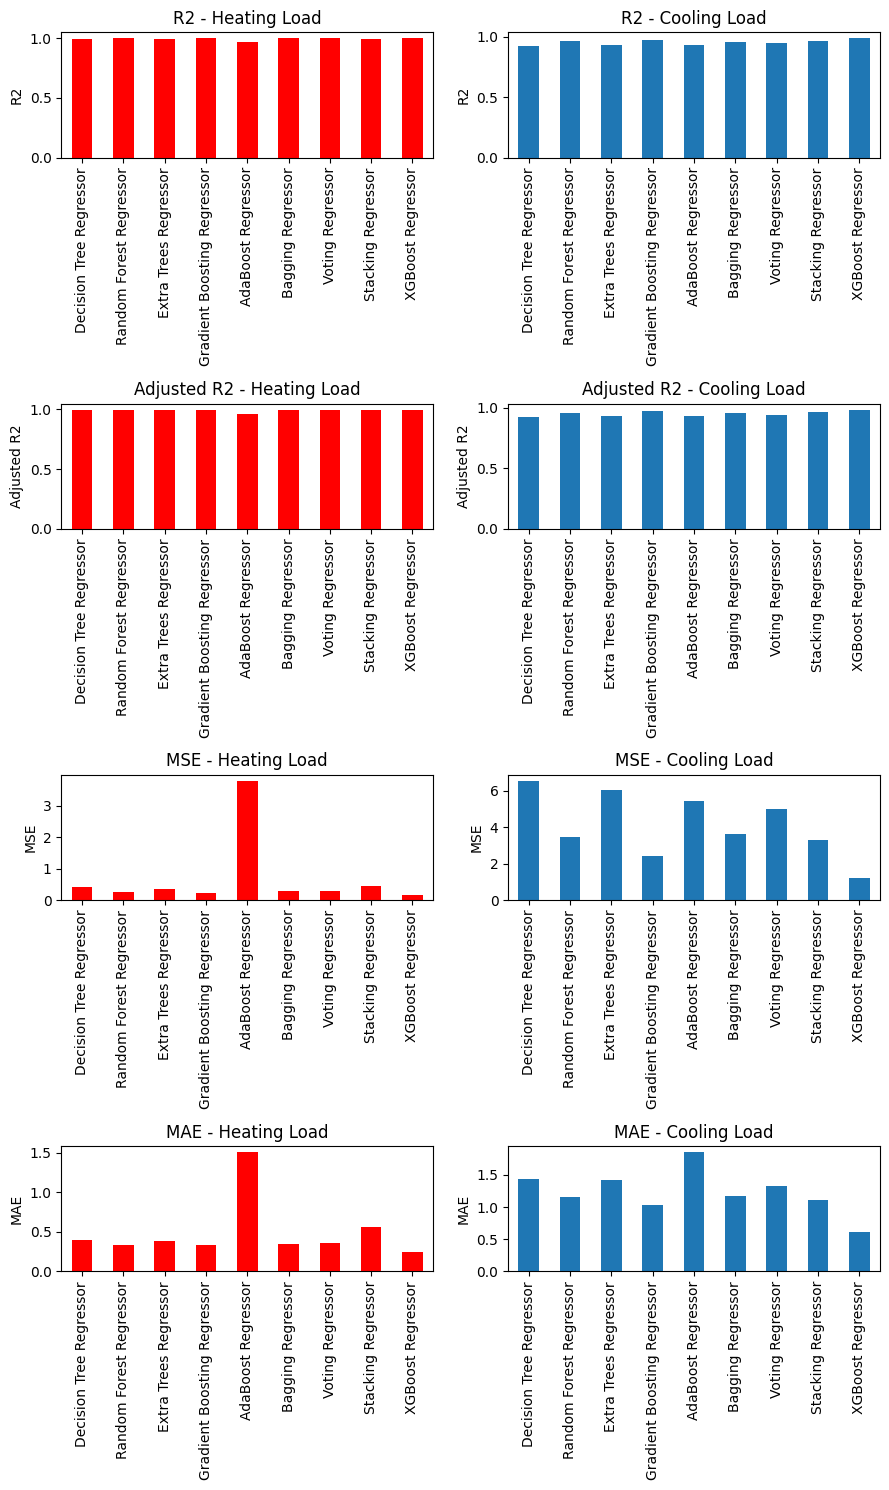

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



## **5. Gaussian Processes (including 1 Regression Algorithms)**

### **Foundation**

* Gaussian Process Classifier (GPC)

  - Function: sklearn.gaussian_process.GaussianProcessClassifier
  - Description: A non-parametric, Bayesian approach to classification. It uses Gaussian processes to define a distribution over functions and makes predictions based on this distribution.
  - Use Case: Classification tasks with small to medium-sized datasets where uncertainty estimation is important.

* Gaussian Process Regressor (GPR)

  - Function: sklearn.gaussian_process.GaussianProcessRegressor
  - Description: Similar to the Gaussian Process Classifier but used for regression tasks. It defines a distribution over possible functions that fit the data and makes predictions based on this distribution.
  - Use Case: Regression tasks with small to medium-sized datasets where uncertainty estimation is important.

### **Building 1 Gaussian Processes Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'Gaussian Process Regressor': GaussianProcessRegressor()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

                                                                 Cooling Load  \
Gaussian Process Regressor  {'MSE': 3.143378242890456, 'R2': 0.96506110054...   

                                                                 Heating Load  
Gaussian Process Regressor  {'MSE': 1.5521813357828909, 'R2': 0.9847668608...  


## **6. Naive Bayes (including 5 Regression Algorithms)**

### **Foundation**

**Naive Bayes** is a family of probabilistic algorithms based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Despite the simplification, Naive Bayes classifiers often perform surprisingly well and are particularly suited for large datasets.

* Gaussian Naive Bayes
  - Function: sklearn.naive_bayes.GaussianNB
  - Description: This variant assumes that the features follow a normal (Gaussian) distribution. It is used when the feature data is continuous.
  - Use Case: Suitable for continuous data, such as heights, weights, or any other measurements that can be assumed to follow a Gaussian distribution.

* Multinomial Naive Bayes
  - Function: sklearn.naive_bayes.MultinomialNB
  - Description: This variant assumes that the features follow a multinomial distribution. It is used for discrete count data, where features represent the number of occurrences of events.
  - Use Case: Commonly used in text classification problems where the features are word counts or term frequencies (e.g., spam detection, document classification).

* Bernoulli Naive Bayes
  - Function: sklearn.naive_bayes.BernoulliNB
  - Description: This variant assumes that the features follow a Bernoulli distribution. It is used for binary/boolean data, where features are binary (0 or 1).
  - Use Case: Suitable for datasets with binary features, such as email filtering (spam or not spam) based on the presence or absence of certain words.

* Complement Naive Bayes
  - Function: sklearn.naive_bayes.ComplementNB
  - Description: This variant is designed to address the issue of imbalanced data by applying a complement model. It is particularly suited for imbalanced classes.
  - Use Case: Often used in text classification where classes are imbalanced, as it tends to perform better than Multinomial Naive Bayes on such datasets.
* Categorical Naive Bayes
  - Function: sklearn.naive_bayes.CategoricalNB
  - Description: This variant is used for categorical data. It assumes that each feature follows a categorical distribution.
  - Use Case: Suitable for datasets where features are categorical variables with a finite set of possible values.

**Summary**
* Gaussian Naive Bayes: For continuous data that follows a normal distribution.
* Multinomial Naive Bayes: For discrete count data, often used in text classification.
* Bernoulli Naive Bayes: For binary/boolean data, where features are binary.
* Complement Naive Bayes: For imbalanced data, particularly in text classification.
* Categorical Naive Bayes: For categorical data with a finite set of possible values.

### **Building 5 Naive Bayes Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
    'Categorical Naive Bayes': CategoricalNB()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

Model Gaussian Naive Bayes failed with error: Unknown label type: (array([ 6.01,  6.04,  6.05,  6.07,  6.37,  6.4 ,  6.77,  6.81,  6.85,
        7.1 ,  7.18,  8.45,  8.49,  8.5 ,  8.6 , 10.08, 10.14, 10.15,
       10.32, 10.34, 10.35, 10.36, 10.38, 10.39, 10.43, 10.45, 10.46,
       10.47, 10.53, 10.54, 10.55, 10.56, 10.64, 10.67, 10.68, 10.7 ,
       10.72, 10.77, 10.78, 10.85, 11.07, 11.09, 11.1 , 11.11, 11.14,
       11.16, 11.18, 11.21, 11.22, 11.32, 11.33, 11.34, 11.38, 11.42,
       11.43, 11.44, 11.45, 11.46, 11.49, 11.53, 11.59, 11.61, 11.64,
       11.67, 11.69, 11.8 , 11.98, 12.02, 12.1 , 12.12, 12.18, 12.19,
       12.2 , 12.25, 12.27, 12.28, 12.29, 12.31, 12.33, 12.34, 12.35,
       12.36, 12.41, 12.42, 12.43, 12.45, 12.46, 12.47, 12.49, 12.5 ,
       12.57, 12.59, 12.62, 12.63, 12.65, 12.67, 12.68, 12.71, 12.72,
       12.73, 12.74, 12.76, 12.77, 12.78, 12.8 , 12.82, 12.84, 12.85,
       12.86, 12.87, 12.88, 12.91, 12.92, 12.93, 12.95, 12.96, 12.97,
       13.  , 13.01, 13

### **Model Comparison 5 Naive Bayes Methods**

In [ ]:
results_df['Heating Load']

KeyError: 'Heating Load'

In [ ]:
results_df['Cooling Load']

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



## **7. Discriminant Analysis (including 2 Regression Algorithms)**

### **Foundation**

**Discriminant Analysis** is a classification method that aims to find a combination of features that best separate two or more classes. It is particularly useful when the classes are well-separated.

* Linear Discriminant Analysis (LDA)
- Function: sklearn.discriminant_analysis.LinearDiscriminantAnalysis
- Description: LDA assumes that the features follow a multivariate normal distribution and that each class has the same covariance matrix. It aims to find a linear combination of features that best separate the classes.
- Use Case: Suitable for classification tasks where the relationship between the features and the class is approximately linear, and the classes have similar covariance.

* Quadratic Discriminant Analysis (QDA)
- Function: sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
- Description: QDA is similar to LDA but allows each class to have its own covariance matrix. This makes it more flexible but also more prone to overfitting, especially with small datasets.
- Use Case: Suitable for classification tasks where the relationship between the features and the class is approximately quadratic, and the classes have different covariances.


Summary
Linear Discriminant Analysis (LDA): Used for classification with linear separation and similar covariance among classes.
Quadratic Discriminant Analysis (QDA): Used for classification with quadratic separation and different covariance among classes.


### **Building 2 Discriminant Analysis Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

### **Model Comparison 2 Discriminant Analysis Models**

In [ ]:
results_df['Heating Load']

In [ ]:
results_df['Cooling Load']

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



## **8. Neural Networks (including 1 Regression Algorithms)**

### **Foundation**


Neural Networks are a set of algorithms inspired by the human brain that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, or clustering of raw input.

Multi-layer Perceptron Classifier (MLP Classifier)
Function: sklearn.neural_network.MLPClassifier
Description: MLP is a type of feedforward artificial neural network that consists of multiple layers of neurons. It uses a supervised learning technique called backpropagation for training. The MLP Classifier is used for classification tasks.
Use Case: Suitable for complex classification tasks where the relationship between features and classes is non-linear. It works well with large amounts of data and can handle complex patterns.
Multi-layer Perceptron Regressor (MLP Regressor)
Function: sklearn.neural_network.MLPRegressor
Description: Similar to the MLP Classifier, but used for regression tasks. It predicts a continuous output.
Use Case: Suitable for complex regression tasks where the relationship between features and the target is non-linear. It works well with large amounts of data and can handle complex patterns.

Summary
Multi-layer Perceptron Classifier (MLP Classifier): Neural network for classification tasks, suitable for complex, non-linear relationships.
Multi-layer Perceptron Regressor (MLP Regressor): Neural network for regression tasks, suitable for complex, non-linear relationships.

### **Building 1 Neural Networks / Multi-layer Perceptron Model**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'MLP Regressor': MLPRegressor()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': mse_heating, 'R2': r2_heating, 'Adjusted R2': adj_r2_heating, 'MAE': mae_heating},
            'Cooling Load': {'MSE': mse_cooling, 'R2': r2_cooling, 'Adjusted R2': adj_r2_cooling, 'MAE': mae_cooling}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

# **Model Selection**

### **Building 36 Regression Models**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), [col for col in input_features.columns if col not in categorical_features])
    ])

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Function to evaluate models with cross-validation, including adjusted R2
def evaluate_model_cv(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error), cv=kf, error_score='raise')
    mae_scores = cross_val_score(model, X, y, scoring=make_scorer(mean_absolute_error), cv=kf, error_score='raise')
    r2_scores = cross_val_score(model, X, y, scoring=make_scorer(r2_score), cv=kf, error_score='raise')
    adjusted_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        k = X.shape[1]
        adjusted_r2_scores.append(adjusted_r2_score(r2, n, k))

    return np.mean(mse_scores), np.mean(r2_scores), np.mean(adjusted_r2_scores), np.mean(mae_scores)

# Define ensemble models for regression tasks
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LARS': Lars(),
    'LassoLARS': LassoLars(),
    'OMP': OrthogonalMatchingPursuit(),
    'BayesianRidge': BayesianRidge(),
    'ARD': ARDRegression(),
    'SGD': SGDRegressor(),
    'PassiveAggressive': PassiveAggressiveRegressor(),
    'Huber': HuberRegressor(),
    'Quantile': QuantileRegressor(solver='highs'),
    'SVR': SVR(),
    'NuSVR': NuSVR(),
    'LinearSVR': LinearSVR(max_iter=10000),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'RadiusNeighbors Regressor': RadiusNeighborsRegressor(radius=1.0),  # You can adjust the radius as needed
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Voting Regressor': VotingRegressor(estimators=[
        ('dt', DecisionTreeRegressor()),
        ('rf', RandomForestRegressor()),
        ('et', ExtraTreesRegressor())
    ]),
    'Stacking Regressor': StackingRegressor(estimators=[
        ('dt', DecisionTreeRegressor()),
        ('rf', RandomForestRegressor()),
        ('et', ExtraTreesRegressor())
    ]),
    'XGBoost Regressor': XGBRegressor(),
    'Gaussian Process Regressor': GaussianProcessRegressor(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
    'Categorical Naive Bayes': CategoricalNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'MLP Regressor': MLPRegressor()
}

# Evaluate all regression models and store results
results = {}
for name, model in regression_models.items():
    try:
        # Create a pipeline that includes preprocessing and the model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        mse_heating, r2_heating, adj_r2_heating, mae_heating = evaluate_model_cv(model_pipeline, input_features, y_heating)
        mse_cooling, r2_cooling, adj_r2_cooling, mae_cooling = evaluate_model_cv(model_pipeline, input_features, y_cooling)
        results[name] = {
            'Heating Load': {'MSE': np.round(mse_heating,4) ,
                             'R2': np.round(r2_heating,4),
                             'Adjusted R2': np.round(adj_r2_heating,4),
                             'MAE': np.round(mae_heating,4)},
            'Cooling Load': {'MSE': np.round(mse_cooling,4) ,
                            'R2': np.round(r2_cooling, 4),
                            'Adjusted R2': np.round(adj_r2_cooling, 4),
                            'MAE': np.round(mae_cooling, 4)}
        }
    except Exception as e:
        print(f"Model {name} failed with error: {e}")

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model RadiusNeighbors Regressor failed with error: Input contains NaN.
Model Gaussian Naive Bayes failed with error: Unknown label type: (array([ 6.01,  6.04,  6.05,  6.07,  6.37,  6.4 ,  6.77,  6.81,  6.85,
        7.1 ,  7.18,  8.45,  8.49,  8.5 ,  8.6 , 10.08, 10.14, 10.15,
       10.32, 10.34, 10.35, 10.36, 10.38, 10.39, 10.43, 10.45, 10.46,
       10.47, 10.53, 10.54, 10.55, 10.56, 10.64, 10.67, 10.68, 10.7 ,
       10.72, 10.77, 10.78, 10.85, 11.07, 11.09, 11.1 , 11.11, 11.14,
       11.16, 11.18, 11.21, 11.22, 11.32, 11.33, 11.34, 11.38, 11.42,
       11.43, 11.44, 11.45, 11.46, 11.49, 11.53, 11.59, 11.61, 11.64,
       11.67, 11.69, 11.8 , 11.98, 12.02, 12.1 , 12.12, 12.18, 12.19,
       12.2 , 12.25, 12.27, 12.28, 12.29, 12.31, 12.33, 12.34, 12.35,
       12.36, 12.41, 12.42, 12.43, 12.45, 12.46, 12.47, 12.49, 12.5 ,
       12.57, 12.59, 12.62, 12.63, 12.65, 12.67, 12.68, 12.71, 12.72,
       12.73, 12.74, 12.76, 12.77, 12.78, 12.8 , 12.82, 12.84, 12.85,
       12.86, 12.87, 1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

                                                                  Heating Load  \
Linear Regression            {'MSE': 8.0643, 'R2': 0.9201, 'Adjusted R2': 0...   
Ridge                        {'MSE': 8.0826, 'R2': 0.92, 'Adjusted R2': 0.9...   
Lasso                        {'MSE': 11.8516, 'R2': 0.8826, 'Adjusted R2': ...   
ElasticNet                   {'MSE': 17.1959, 'R2': 0.8299, 'Adjusted R2': ...   
LARS                         {'MSE': 15.5464, 'R2': 0.8353, 'Adjusted R2': ...   
LassoLARS                    {'MSE': 11.8515, 'R2': 0.8826, 'Adjusted R2': ...   
OMP                          {'MSE': 21.3725, 'R2': 0.7872, 'Adjusted R2': ...   
BayesianRidge                {'MSE': 8.0767, 'R2': 0.92, 'Adjusted R2': 0.9...   
ARD                          {'MSE': 7.9246, 'R2': 0.9215, 'Adjusted R2': 0...   
SGD                          {'MSE': 8.2042, 'R2': 0.9188, 'Adjusted R2': 0...   
PassiveAggressive            {'MSE': 14.5569, 'R2': 0.8105, 'Adjusted R2': ...   
Huber           

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Model Comparison 36 Regression Models**

In [ ]:
pd.set_option('display.max_colwidth', None)
results_df['Heating Load']

Linear Regression                 {'MSE': 8.0643, 'R2': 0.9201, 'Adjusted R2': 0.9157, 'MAE': 2.0412}
Ridge                               {'MSE': 8.0826, 'R2': 0.92, 'Adjusted R2': 0.9155, 'MAE': 2.0475}
Lasso                            {'MSE': 11.8516, 'R2': 0.8826, 'Adjusted R2': 0.8761, 'MAE': 2.4987}
ElasticNet                       {'MSE': 17.1959, 'R2': 0.8299, 'Adjusted R2': 0.8205, 'MAE': 3.0946}
LARS                             {'MSE': 15.5464, 'R2': 0.8353, 'Adjusted R2': 0.8262, 'MAE': 2.7466}
LassoLARS                        {'MSE': 11.8515, 'R2': 0.8826, 'Adjusted R2': 0.8761, 'MAE': 2.4987}
OMP                              {'MSE': 21.3725, 'R2': 0.7872, 'Adjusted R2': 0.7754, 'MAE': 3.5109}
BayesianRidge                       {'MSE': 8.0767, 'R2': 0.92, 'Adjusted R2': 0.9156, 'MAE': 2.0462}
ARD                               {'MSE': 7.9246, 'R2': 0.9215, 'Adjusted R2': 0.9172, 'MAE': 2.0321}
SGD                                {'MSE': 8.2042, 'R2': 0.9188, 'Adjusted R2': 0.

In [ ]:
results_df['Cooling Load']

Linear Regression                {'MSE': 10.2751, 'R2': 0.8855, 'Adjusted R2': 0.8791, 'MAE': 2.2777}
Ridge                               {'MSE': 10.291, 'R2': 0.8853, 'Adjusted R2': 0.879, 'MAE': 2.279}
Lasso                            {'MSE': 13.6273, 'R2': 0.8483, 'Adjusted R2': 0.8399, 'MAE': 2.7556}
ElasticNet                       {'MSE': 18.1189, 'R2': 0.7985, 'Adjusted R2': 0.7874, 'MAE': 3.2103}
LARS                               {'MSE': 11.1448, 'R2': 0.876, 'Adjusted R2': 0.8692, 'MAE': 2.445}
LassoLARS                        {'MSE': 13.6273, 'R2': 0.8483, 'Adjusted R2': 0.8399, 'MAE': 2.7556}
OMP                               {'MSE': 17.9306, 'R2': 0.7997, 'Adjusted R2': 0.7887, 'MAE': 3.149}
BayesianRidge                     {'MSE': 10.294, 'R2': 0.8853, 'Adjusted R2': 0.8789, 'MAE': 2.2795}
ARD                              {'MSE': 10.2451, 'R2': 0.8858, 'Adjusted R2': 0.8795, 'MAE': 2.2668}
SGD                               {'MSE': 10.4215, 'R2': 0.884, 'Adjusted R2': 0.8

In [ ]:
# Find the best model for each metric
best_models = {}
for load_type in ['Heating Load', 'Cooling Load']:
    best_mse_model = results_df[load_type].apply(lambda x: x['MSE']).idxmin()
    best_r2_model = results_df[load_type].apply(lambda x: x['R2']).idxmax()
    best_adj_r2_model = results_df[load_type].apply(lambda x: x['Adjusted R2']).idxmax()
    best_mae_model = results_df[load_type].apply(lambda x: x['MAE']).idxmin()
    best_models[load_type] = {
        'Best MSE Model': best_mse_model,
        'Best R2 Model': best_r2_model,
        'Best Adjusted R2 Model': best_adj_r2_model,
        'Best MAE Model': best_mae_model
    }

# Print best models for each metric
for load_type, metrics in best_models.items():
    print(f"\n{load_type}:")
    for metric, model in metrics.items():
        print(f"  {metric}: {model}")


Heating Load:
  Best MSE Model: XGBoost Regressor
  Best R2 Model: XGBoost Regressor
  Best Adjusted R2 Model: XGBoost Regressor
  Best MAE Model: XGBoost Regressor

Cooling Load:
  Best MSE Model: XGBoost Regressor
  Best R2 Model: XGBoost Regressor
  Best Adjusted R2 Model: XGBoost Regressor
  Best MAE Model: XGBoost Regressor


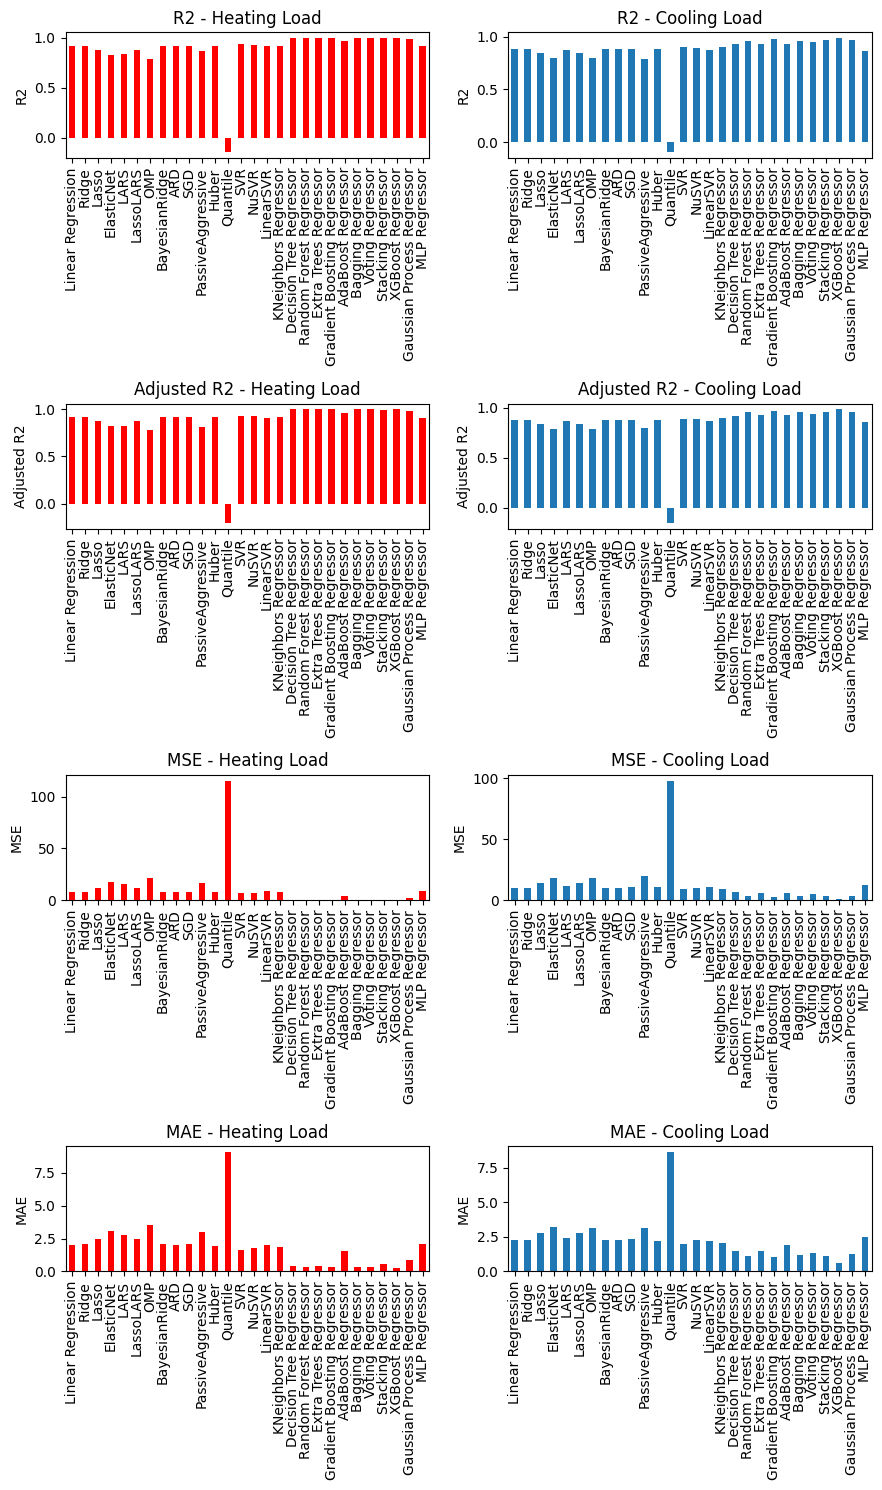

In [ ]:
# Plotting
fig, axes = plt.subplots(4, 2, figsize=(9, 15))

# Plot R2
results_df['Heating Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 0], title='R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['R2']).plot(kind='bar', ax=axes[0, 1], title='R2 - Cooling Load')
axes[0, 0].set_ylabel('R2')
axes[0, 1].set_ylabel('R2')

# Plot Adjusted R2
results_df['Heating Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 0], title='Adjusted R2 - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['Adjusted R2']).plot(kind='bar', ax=axes[1, 1], title='Adjusted R2 - Cooling Load')
axes[1, 0].set_ylabel('Adjusted R2')
axes[1, 1].set_ylabel('Adjusted R2')

# Plot MSE
results_df['Heating Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 0], title='MSE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MSE']).plot(kind='bar', ax=axes[2, 1], title='MSE - Cooling Load')
axes[2, 0].set_ylabel('MSE')
axes[2, 1].set_ylabel('MSE')

# Plot MAE
results_df['Heating Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 0], title='MAE - Heating Load', color='red')
results_df['Cooling Load'].apply(lambda x: x['MAE']).plot(kind='bar', ax=axes[3, 1], title='MAE - Cooling Load')
axes[3, 0].set_ylabel('MAE')
axes[3, 1].set_ylabel('MAE')

plt.tight_layout()
plt.show()



# **Build Final Model**

In [ ]:
# Load your data
input_features, target_feature, metadata, variables_info = load_data_from_uci(id_code=242)
y_heating = target_feature['Y1']
y_cooling = target_feature['Y2']

column_mapping = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution'
}

input_features.rename(columns=column_mapping, inplace=True)

# Ignore convergence warnings for LARS model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning, module='sklearn.linear_model._least_angle')

# Identify categorical features: 'Orientation', 'Glazing Area Distribution'
categorical_features = ['Orientation', 'Glazing Area Distribution']

# Define the column transformer with OneHotEncoder for categorical features and SimpleImputer for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), [col for col in input_features.columns if col not in categorical_features])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train_heating, y_test_heating, y_train_cooling, y_test_cooling = train_test_split(
    input_features,
    y_heating, y_cooling,
    test_size=0.2, random_state=42
)

# Create a pipeline for the XGBoost model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Train the model for Heating Load
model_pipeline.fit(X_train, y_train_heating)
y_pred_heating = model_pipeline.predict(X_test)

# Train the model for Cooling Load
model_pipeline.fit(X_train, y_train_cooling)
y_pred_cooling = model_pipeline.predict(X_test)


# **Apply Final Model**

Heating Load - MSE: 0.1519291672348557, R2: 0.9985423879085428, MAE: 0.24986640050813744
Cooling Load - MSE: 2.214518877868354, R2: 0.9760998821788017, MAE: 0.6515606317891703


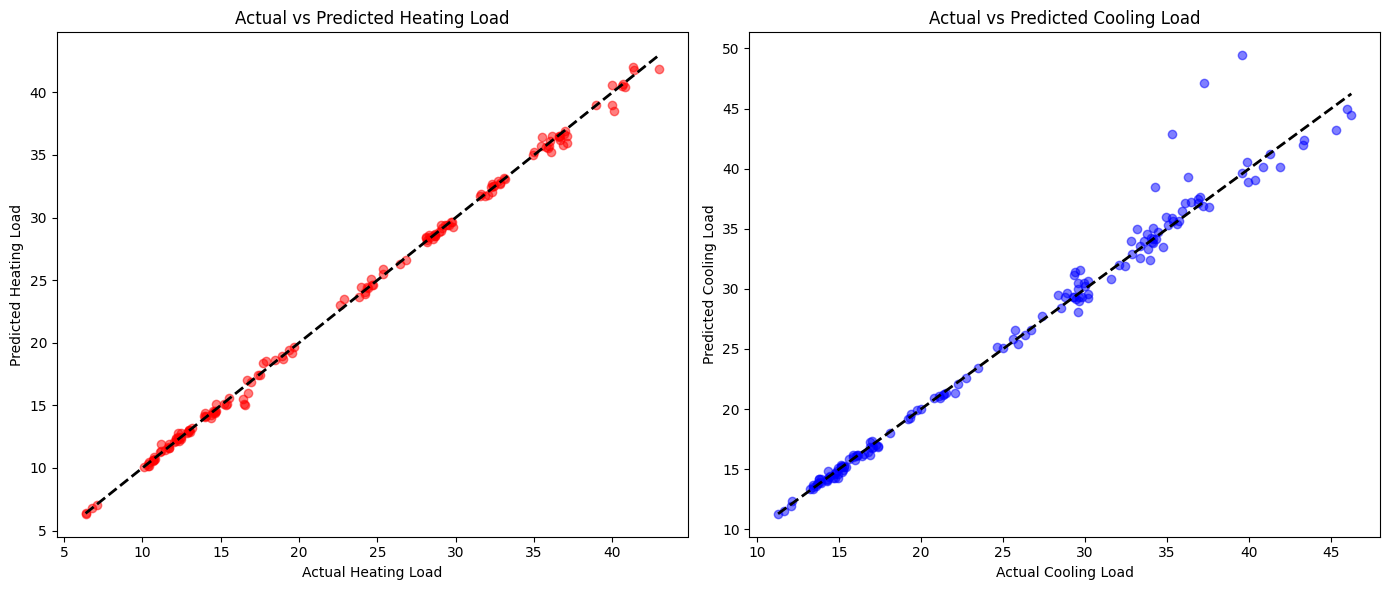

In [ ]:
# Calculate performance metrics
mse_heating = mean_squared_error(y_test_heating, y_pred_heating)
r2_heating = r2_score(y_test_heating, y_pred_heating)
mae_heating = mean_absolute_error(y_test_heating, y_pred_heating)

mse_cooling = mean_squared_error(y_test_cooling, y_pred_cooling)
r2_cooling = r2_score(y_test_cooling, y_pred_cooling)
mae_cooling = mean_absolute_error(y_test_cooling, y_pred_cooling)

print(f"Heating Load - MSE: {mse_heating}, R2: {r2_heating}, MAE: {mae_heating}")
print(f"Cooling Load - MSE: {mse_cooling}, R2: {r2_cooling}, MAE: {mae_cooling}")

# Visualize the actual vs predicted values
plt.figure(figsize=(14, 6))

# Heating Load
plt.subplot(1, 2, 1)
plt.scatter(y_test_heating, y_pred_heating, color='red', alpha=0.5)
plt.plot([y_test_heating.min(), y_test_heating.max()], [y_test_heating.min(), y_test_heating.max()], 'k--', lw=2)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load')

# Cooling Load
plt.subplot(1, 2, 2)
plt.scatter(y_test_cooling, y_pred_cooling, color='blue', alpha=0.5)
plt.plot([y_test_cooling.min(), y_test_cooling.max()], [y_test_cooling.min(), y_test_cooling.max()], 'k--', lw=2)
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Actual vs Predicted Cooling Load')

plt.tight_layout()
plt.show()


# Explain Final Model

<Figure size 1000x500 with 0 Axes>

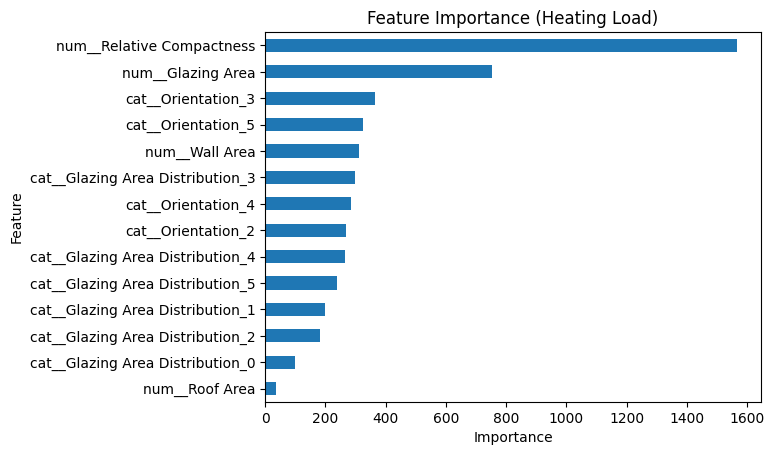

<Figure size 1000x500 with 0 Axes>

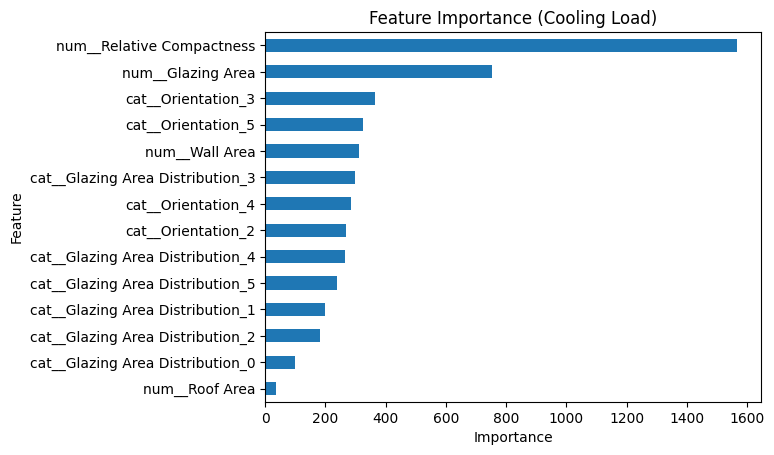

In [ ]:
# Extract the XGBoost model from the pipeline
xgb_model_heating = model_pipeline.named_steps['regressor']
xgb_model_cooling = model_pipeline.named_steps['regressor']

# Get feature names
preprocessed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

importances_heating = xgb_model_heating.get_booster().get_score(importance_type='weight')
importances_cooling = xgb_model_cooling.get_booster().get_score(importance_type='weight')

# Convert the feature importance to a DataFrame and map the feature names
importance_df_heating = pd.DataFrame(importances_heating.items(), columns=['Feature', 'Importance'])
importance_df_heating['Feature'] = importance_df_heating['Feature'].apply(lambda x: preprocessed_feature_names[int(x[1:])])

importance_df_cooling = pd.DataFrame(importances_cooling.items(), columns=['Feature', 'Importance'])
importance_df_cooling['Feature'] = importance_df_cooling['Feature'].apply(lambda x: preprocessed_feature_names[int(x[1:])])

# Plot feature importance for Heating Load
plt.figure(figsize=(10, 5))
importance_df_heating.sort_values(by='Importance').plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance (Heating Load)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot feature importance for Cooling Load
plt.figure(figsize=(10, 5))
importance_df_cooling.sort_values(by='Importance').plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance (Cooling Load)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


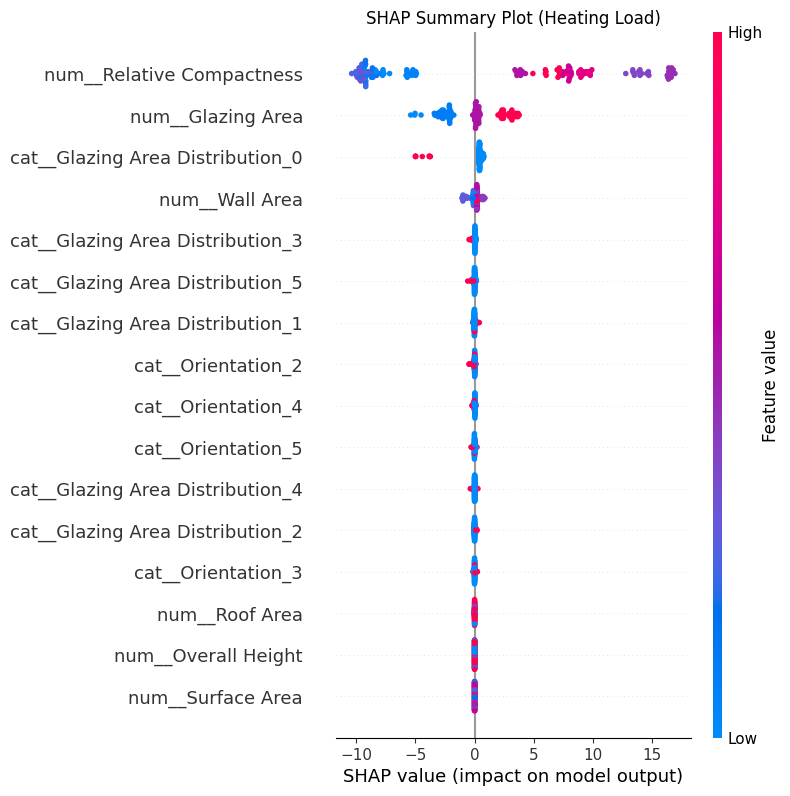

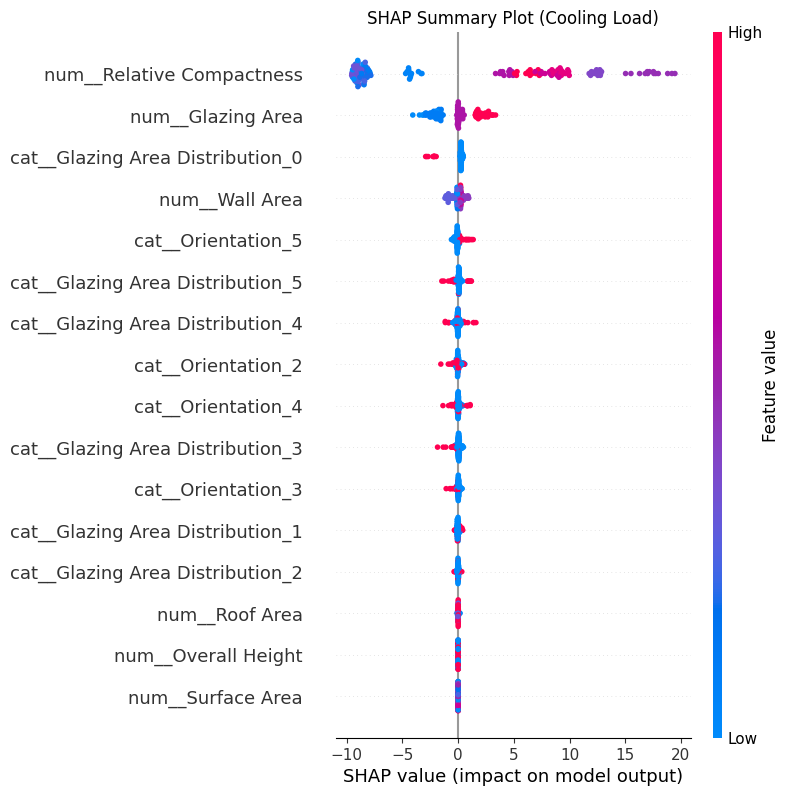

In [ ]:
# Train the model for Heating Load and use SHAP
model_pipeline.fit(X_train, y_train_heating)
explainer_heating = shap.Explainer(model_pipeline.named_steps['regressor'],
                                   model_pipeline.named_steps['preprocessor'].transform(X_train))
shap_values_heating = explainer_heating(model_pipeline.named_steps['preprocessor'].transform(X_test))

# Train the model for Cooling Load and use SHAP
model_pipeline.fit(X_train, y_train_cooling)
explainer_cooling = shap.Explainer(model_pipeline.named_steps['regressor'],
                                   model_pipeline.named_steps['preprocessor'].transform(X_train))
shap_values_cooling = explainer_cooling(model_pipeline.named_steps['preprocessor'].transform(X_test))

# Get feature names
preprocessed_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Summary plot for Heating Load
shap.summary_plot(shap_values_heating, feature_names=preprocessed_feature_names, show = False)
plt.title('SHAP Summary Plot (Heating Load)')
plt.show()

# Summary plot for Cooling Load
shap.summary_plot(shap_values_cooling, feature_names=preprocessed_feature_names, show = False)
plt.title('SHAP Summary Plot (Cooling Load)')
plt.show()
